# GSE159032
## Xiaonan Wang
## 17Aug2022

In [1]:
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import anndata
import seaborn as sns

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)

/cluster/groups/Wangxiaonan/programs/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.9.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.8


# Data in - GSE159032

In [2]:
FileDir = '/nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/'

In [3]:
Smat1 = pd.read_csv('./GSE159032-GPL20828_series_matrix.txt', sep='\t', skiprows=34, index_col=0, header=None).T

In [14]:
Smat1

0                        !Sample_title !Sample_geo_accession  \
1                     Healthy heart H5            GSM4817928   
2                     Healthy heart H6            GSM4817929   
3                     Healthy heart H7            GSM4817930   
4            Healthy heart H8 - Atrium            GSM4817931   
5         Healthy heart H8 - Ventricle            GSM4817932   
6                    Injured heart Hr1            GSM4817933   
7                    Injured heart Hr2            GSM4817934   
8           Injured heart Hr6 - Atrium            GSM4817938   
9        Injured heart Hr6 - Ventricle            GSM4817939   
10          Injured heart Hr7 - Atrium            GSM4817940   
11       Injured heart Hr7 - Ventricle            GSM4817941   
12                   Injured heart Hr9            GSM4817942   
13                  Injured heart Hr10            GSM4817943   
14                  Injured heart Hr22            GSM4817950   
15                  Injured heart Hr24            GSM4817951   
16                  Injured heart Hr25            GSM4817952   
17                  Injured heart Hr26            GSM4817953   
18                  Injured heart Hr27            GSM4817954   
19                  Injured heart Hr28            GSM4817955   
20                  Injured heart Hr29            GSM4817956   
21                  Injured heart Hr30            GSM4817957   
22                  Injured heart Hr31            GSM4817958   
23                  Injured heart Hr32            GSM4817959   
24                  Injured heart Hr33            GSM4817960   
25                  Injured heart Hr34            GSM4817961   
26                  Injured heart Hr35            GSM4817962   
27             Healthy heart H5 - scar            GSM4817963   
28             Healthy heart H6 - scar            GSM4817964   
29             Healthy heart H7 - scar            GSM4817965   
30     Healthy heart H8  - scar_atrium            GSM4817966   
31  Healthy heart H8  - scar_ventricle            GSM4817967   
32            Injured heart Hr1 - scar            GSM4817968   
33            Injured heart Hr2 - scar            GSM4817969   
34           Injured heart Hr6  - scar            GSM4817972   
35            Injured heart Hr7 - scar            GSM4817973   
36           Injured heart Hr10 - scar            GSM4817974   
37           Injured heart Hr11 - scar            GSM4817975   
38           Injured heart Hr22 - scar            GSM4817983   
39           Injured heart Hr23 - scar            GSM4817984   
40           Injured heart Hr24 - scar            GSM4817985   
41           Injured heart Hr25 - scar            GSM4817986   
42           Injured heart Hr26 - scar            GSM4817987   
43           Injured heart Hr27 - scar            GSM4817988   

0          !Sample_status !Sample_submission_date !Sample_last_update_date  \
1   Public on May 06 2022             Oct 05 2020              May 06 2022   
2   Public on May 06 2022             Oct 05 2020              May 06 2022   
3   Public on May 06 2022             Oct 05 2020              May 06 2022   
4   Public on May 06 2022             Oct 05 2020              May 06 2022   
5   Public on May 06 2022             Oct 05 2020              May 06 2022   
6   Public on May 06 2022             Oct 05 2020              May 06 2022   
7   Public on May 06 2022             Oct 05 2020              May 06 2022   
8   Public on May 06 2022             Oct 05 2020              May 06 2022   
9   Public on May 06 2022             Oct 05 2020              May 06 2022   
10  Public on May 06 2022             Oct 05 2020              May 06 2022   
11  Public on May 06 2022             Oct 05 2020              May 06 2022   
12  Public on May 06 2022             Oct 05 2020              May 06 2022   
13  Public on May 06 2022             Oct 05 2020              May 06 2022   
14  Public on May 06 2022             Oct 05 2020              May 06 2022   
15  Public on

In [4]:
Smat2 = pd.read_csv('./GSE159032-GPL21741_series_matrix.txt', sep='\t', skiprows=34, index_col=0, header=None).T

In [13]:
Smat2

0                                   !Sample_title !Sample_geo_accession  \
1   Injured heart Hr2 - 2nd sample for more cells            GSM4817935   
2                               Injured heart Hr3            GSM4817936   
3                               Injured heart Hr4            GSM4817937   
4                              Injured heart Hr12            GSM4817944   
5                              Injured heart Hr13            GSM4817945   
6                              Injured heart Hr14            GSM4817946   
7                              Injured heart Hr19            GSM4817947   
8                              Injured heart Hr20            GSM4817948   
9                              Injured heart Hr21            GSM4817949   
10                       Injured heart Hr3 - scar            GSM4817970   
11                       Injured heart Hr4 - scar            GSM4817971   
12                      Injured heart Hr12 - scar            GSM4817976   
13                      Injured heart Hr13 - scar            GSM4817977   
14                      Injured heart Hr14 - scar            GSM4817978   
15                      Injured heart Hr15 - scar            GSM4817979   
16                      Injured heart Hr19 - scar            GSM4817980   
17                      Injured heart Hr20 - scar            GSM4817981   
18                      Injured heart Hr21 - scar            GSM4817982   

0          !Sample_status !Sample_submission_date !Sample_last_update_date  \
1   Public on May 06 2022             Oct 05 2020              May 06 2022   
2   Public on May 06 2022             Oct 05 2020              May 06 2022   
3   Public on May 06 2022             Oct 05 2020              May 06 2022   
4   Public on May 06 2022             Oct 05 2020              May 06 2022   
5   Public on May 06 2022             Oct 05 2020              May 06 2022   
6   Public on May 06 2022             Oct 05 2020              May 06 2022   
7   Public on May 06 2022             Oct 05 2020              May 06 2022   
8   Public on May 06 2022             Oct 05 2020              May 06 2022   
9   Public on May 06 2022             Oct 05 2020              May 06 2022   
10  Public on May 06 2022             Oct 05 2020              May 06 2022   
11  Public on May 06 2022             Oct 05 2020              May 06 2022   
12  Public on May 06 2022             Oct 05 2020              May 06 2022   
13  Public on May 06 2022             Oct 05 2020              May 06 2022   
14  Public on May 06 2022             Oct 05 2020              May 06 2022   
15  Public on May 06 2022             Oct 05 2020              May 06 2022   
16  Public on May 06 2022             Oct 05 2020              May 06 2022   
17  Public on May 06 2022             Oct 05 2020              May 06 2022   
18  Public on May 06 2022             Oct 05 2020              May 06 2022   

0  !Sample_type !Sample_channel_count !Sample_source_name_ch1  \
1           SRA                     1            Heart tissue   
2           SRA                     1            Heart tissue   
3           SRA                     1            Heart tissue   
4           SRA                     1            Heart tissue   
5           SRA                     1            Heart tissue   
6           SRA                     1            Heart tissue   
7           SRA                     1            Heart tissue   
8           SRA                     1            Heart tissue   
9           SRA                     1            Heart tissue   
10          SRA                     1            Heart tissue   
11          SRA                     1            Heart tissue   
12          SRA                     1            Heart tissue   
13          SRA                     1            Heart tissue   
14          SRA                     1            Heart tissue   
15          SRA                     1            Heart tissue   
16          SRA                     1            He

In [5]:
Smat = pd.concat([Smat1, Smat2])

In [6]:
print(Smat1.shape)
print(Smat2.shape)
print(Smat.shape)

(43, 55)
(18, 55)
(61, 55)


In [33]:
Smat.columns

Index(['!Sample_title', '!Sample_geo_accession', '!Sample_status',
       '!Sample_submission_date', '!Sample_last_update_date', '!Sample_type',
       '!Sample_channel_count', '!Sample_source_name_ch1',
       '!Sample_organism_ch1', '!Sample_characteristics_ch1',
       '!Sample_characteristics_ch1', '!Sample_characteristics_ch1',
       '!Sample_characteristics_ch1', '!Sample_characteristics_ch1',
       '!Sample_characteristics_ch1', '!Sample_treatment_protocol_ch1',
       '!Sample_treatment_protocol_ch1', '!Sample_growth_protocol_ch1',
       '!Sample_molecule_ch1', '!Sample_extract_protocol_ch1',
       '!Sample_extract_protocol_ch1', '!Sample_taxid_ch1',
       '!Sample_description', '!Sample_data_processing',
       '!Sample_data_processing', '!Sample_data_processing',
       '!Sample_data_processing', '!Sample_data_processing',
       '!Sample_data_processing', '!Sample_data_processing',
       '!Sample_data_processing', '!Sample_data_processing',
       '!Sample_data_process

In [7]:
meta1 = Smat.iloc[:, [0,1,7,8,9,10,11,12,13]].copy()

In [37]:
meta1.head(2)

0     !Sample_title !Sample_geo_accession !Sample_source_name_ch1  \
1  Healthy heart H5            GSM4817928            Heart tissue   
2  Healthy heart H6            GSM4817929            Heart tissue   

0 !Sample_organism_ch1 !Sample_characteristics_ch1  \
1          Danio rerio               tissue: heart   
2          Danio rerio               tissue: heart   

0 !Sample_characteristics_ch1 !Sample_characteristics_ch1  \
1          condition: Healthy   days post injury (dpi): 0   
2          condition: Healthy   days post injury (dpi): 0   

0 !Sample_characteristics_ch1 !Sample_characteristics_ch1  
1      treatment: non-treated          strain: Zebrabow M  
2      treatment: non-treated          strain: Zebrabow M

In [8]:
meta = pd.DataFrame([])
meta['Index'] = meta1.iloc[:,1].values
meta['Age'] = '4-12m'
meta['Development_stage'] = 'adult'
meta['Condition'] = [x.replace('condition: ', '') for x in meta1.iloc[:,5].values]
meta['Day'] = [int(x.replace('days post injury (dpi): ', '')) for x in meta1.iloc[:,6].values]
meta['Strain'] = [x.replace('strain: ','') for x in meta1.iloc[:,8]]
Tissue = [x.split('- ')[1] if '-' in x else x.split(' ')[1] for x in meta1.iloc[:,0].values]
Tissue = ['heart' if '2nd' in x else x for x in Tissue ]
meta['Tissue'] = Tissue
meta['StudyID'] = 'GSE159032'
meta['CellType'] = 'All cells'
meta['Genotype'] = 'WT'
meta['Organism'] = meta1.iloc[:,3].values
meta['Gender'] = 'mixed'
meta['Author'] = 'BoHu'
meta['FishID'] = [x.split(' ')[2] for x in meta1.iloc[:,0].values]
meta['Treatment'] = [x.replace('treatment: ', '').split('-')[0] for x in meta1.iloc[:,7].values]

In [9]:
meta.shape

(61, 15)

In [11]:
pd.set_option('display.max_rows', None)

In [12]:
meta

Index    Age Development_stage Condition  Day      Strain  \
0   GSM4817928  4-12m             adult   Healthy    0  Zebrabow M   
1   GSM4817929  4-12m             adult   Healthy    0  Zebrabow M   
2   GSM4817930  4-12m             adult   Healthy    0  Zebrabow M   
3   GSM4817931  4-12m             adult   Healthy    0  Zebrabow M   
4   GSM4817932  4-12m             adult   Healthy    0  Zebrabow M   
5   GSM4817933  4-12m             adult   Injured    7  Zebrabow M   
6   GSM4817934  4-12m             adult   Injured    7  Zebrabow M   
7   GSM4817938  4-12m             adult   Injured    7  Zebrabow M   
8   GSM4817939  4-12m             adult   Injured    7  Zebrabow M   
9   GSM4817940  4-12m             adult   Injured    7  Zebrabow M   
10  GSM4817941  4-12m             adult   Injured    7  Zebrabow M   
11  GSM4817942  4-12m             adult   Injured    7  Zebrabow M   
12  GSM4817943  4-12m             adult   Injured    3  Zebrabow M   
13  GSM4817950  4-12m             adult   Injured    3  Zebrabow M   
14  GSM4817951  4-12m             adult   Injured    3  Zebrabow M   
15  GSM4817952  4-12m             adult   Injured    3  Zebrabow M   
16  GSM4817953  4-12m             adult   Injured    3  Zebrabow M   
17  GSM4817954  4-12m             adult   Injured    3  Zebrabow M   
18  GSM4817955  4-12m             adult   Injured    3  Zebrabow M   
19  GSM4817956  4-12m             adult   Injured    3  Zebrabow M   
20  GSM4817957  4-12m             adult   Injured    7  Zebrabow M   
21  GSM4817958  4-12m             adult   Injured    7  Zebrabow M   
22  GSM4817959  4-12m             adult   Injured    7  Zebrabow M   
23  GSM4817960  4-12m             adult   Injured    7  Zebrabow M   
24  GSM4817961  4-12m             adult   Injured    3  Zebrabow M   
25  GSM4817962  4-12m             adult   Injured    3  Zebrabow M   
26  GSM4817963  4-12m             adult   Healthy    0  Zebrabow M   
27  GSM4817964  4-12m             adult   Healthy    0  Zebrabow M   
28  GSM4817965  4-12m             adult   Healthy    0  Zebrabow M   
29  GSM4817966  4-12m             adult   Healthy    0  Zebrabow M   
30  GSM4817967  4-12m             adult   Healthy    0  Zebrabow M   
31  GSM4817968  4-12m             adult   Injured    7  Zebrabow M   
32  GSM4817969  4-12m             adult   Injured    7  Zebrabow M   
33  GSM4817972  4-12m             adult   Injured    7  Zebrabow M   
34  GSM4817973  4-12m             adult   Injured    7  Zebrabow M   
35  GSM4817974  4-12m             adult   Injured    3  Zebrabow M   
36  GSM4817975  4-12m             adult   Injured    3  Zebrabow M   
37  GSM4817983  4-12m             adult   Injured    3  Zebrabow M   
38  GSM4817984  4-12m             adult   Injured    3  Zebrabow M   
39  GSM4817985  4-12m             adult   Injured    3  Zebrabow M   
40  GSM4817986  4-12m             adult   Injured    3  Zebrabow M   
41  GSM4817987  4-12m             adult   Injured    3  Zebrabow M   
42  GSM4817988  4-12m             adult   Injured    3  Zebrabow M   
43  GSM4817935  4-12m             adult   Injured    7  Zebrabow M   
44  GSM4817936  4-12m             adult   Injured   30  Zebrabow M   
45  GSM4817937  4-12m             adult   Injured   30  Zebrabow M   
46  GSM4817944  4-12m             adult   Injured    3  Zebrabow M   
47  GSM4817945  4-12m             adult   Injured    7  Zebrabow M   
48  GSM4817946  4-12m             adult   Injured    7  Zebrabow M   
49  GSM4817947  4-12m             adult   Injured   30  Zebrabow M   
50  GSM4817948  4-12m             adult   Injured   30  Zebrabow M   
51  GSM4817949  4-12m             adult   Injured   30  Zebrabow M   
52  GSM4817970  4-12m             adult   Injured   30  Zebrabow M   
53  GSM4817971  4-12m             adult   Injured   30  Zebrabow M   
54  GSM4817976  4-12m             adult   Injured    3  Zebrabow M   
55  GSM4817977  4-12m             adult   Injured    7  Zebrabow M   
56  GSM4817978  4-1

# Data in - GSE158919

In [20]:
Smat3 = pd.read_csv('./GSE158919-GPL20828_series_matrix.txt', sep='\t', skiprows=35, index_col=0, header=None).T

In [21]:
Smat3.head()

0       !Sample_title !Sample_geo_accession         !Sample_status  \
1   Injured heart Hr8            GSM4815755  Public on May 06 2022   
2  Injured heart Hr23            GSM4815760  Public on May 06 2022   

0 !Sample_submission_date !Sample_last_update_date !Sample_type  \
1             Oct 02 2020              May 06 2022          SRA   
2             Oct 02 2020              May 06 2022          SRA   

0 !Sample_channel_count !Sample_source_name_ch1 !Sample_organism_ch1  \
1                     1         Zebrafish heart          Danio rerio   
2                     1         Zebrafish heart          Danio rerio   

0 !Sample_characteristics_ch1  ... !Sample_instrument_model  \
1               tissue: heart  ...     Illumina NextSeq 500   
2               tissue: heart  ...     Illumina NextSeq 500   

0 !Sample_library_selection !Sample_library_source !Sample_library_strategy  \
1                      cDNA         transcriptomic                  RNA-Seq   
2                      cDNA         transcriptomic                  RNA-Seq   

0                                   !Sample_relation  \
1  BioSample: https://www.ncbi.nlm.nih.gov/biosam...   
2  BioSample: https://www.ncbi.nlm.nih.gov/biosam...   

0                                   !Sample_relation  \
1  SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...   
2  SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...   

0                       !Sample_supplementary_file_1  \
1  ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4815...   
2  ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4815...   

0 !series_matrix_table_begin      ID_REF !series_matrix_table_end  
1                        NaN  GSM4815755                      NaN  
2                        NaN  GSM4815760                      NaN  

[2 rows x 44 columns]

In [22]:
Smat4 = pd.read_csv('./GSE158919-GPL21741_series_matrix.txt', sep='\t', skiprows=35, index_col=0, header=None).T

In [23]:
Smat4.head()

0       !Sample_title !Sample_geo_accession         !Sample_status  \
1  Injured heart Hr11            GSM4815756  Public on May 06 2022   
2  Injured heart Hr15            GSM4815757  Public on May 06 2022   
3  Injured heart Hr16            GSM4815758  Public on May 06 2022   
4  Injured heart Hr18            GSM4815759  Public on May 06 2022   

0 !Sample_submission_date !Sample_last_update_date !Sample_type  \
1             Oct 02 2020              May 06 2022          SRA   
2             Oct 02 2020              May 06 2022          SRA   
3             Oct 02 2020              May 06 2022          SRA   
4             Oct 02 2020              May 06 2022          SRA   

0 !Sample_channel_count !Sample_source_name_ch1 !Sample_organism_ch1  \
1                     1         Zebrafish heart          Danio rerio   
2                     1         Zebrafish heart          Danio rerio   
3                     1         Zebrafish heart          Danio rerio   
4                     1         Zebrafish heart          Danio rerio   

0 !Sample_characteristics_ch1  ... !Sample_instrument_model  \
1               tissue: heart  ...      Illumina HiSeq 4000   
2               tissue: heart  ...      Illumina HiSeq 4000   
3               tissue: heart  ...      Illumina HiSeq 4000   
4               tissue: heart  ...      Illumina HiSeq 4000   

0 !Sample_library_selection !Sample_library_source !Sample_library_strategy  \
1                      cDNA         transcriptomic                  RNA-Seq   
2                      cDNA         transcriptomic                  RNA-Seq   
3                      cDNA         transcriptomic                  RNA-Seq   
4                      cDNA         transcriptomic                  RNA-Seq   

0                                   !Sample_relation  \
1  BioSample: https://www.ncbi.nlm.nih.gov/biosam...   
2  BioSample: https://www.ncbi.nlm.nih.gov/biosam...   
3  BioSample: https://www.ncbi.nlm.nih.gov/biosam...   
4  BioSample: https://www.ncbi.nlm.nih.gov/biosam...   

0                                   !Sample_relation  \
1  SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...   
2  SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...   
3  SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...   
4  SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...   

0                       !Sample_supplementary_file_1  \
1  ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4815...   
2  ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4815...   
3  ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4815...   
4  ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4815...   

0 !series_matrix_table_begin      ID_REF !series_matrix_table_end  
1                        NaN  GSM4815756                      NaN  
2                        NaN  GSM4815757                      NaN  
3                        NaN  GSM4815758                      NaN  
4                        NaN  GSM4815759                      NaN  

[4 rows x 44 columns]

In [24]:
Smat_new = pd.concat([Smat3, Smat4])

In [25]:
Smat_new

0       !Sample_title !Sample_geo_accession         !Sample_status  \
1   Injured heart Hr8            GSM4815755  Public on May 06 2022   
2  Injured heart Hr23            GSM4815760  Public on May 06 2022   
1  Injured heart Hr11            GSM4815756  Public on May 06 2022   
2  Injured heart Hr15            GSM4815757  Public on May 06 2022   
3  Injured heart Hr16            GSM4815758  Public on May 06 2022   
4  Injured heart Hr18            GSM4815759  Public on May 06 2022   

0 !Sample_submission_date !Sample_last_update_date !Sample_type  \
1             Oct 02 2020              May 06 2022          SRA   
2             Oct 02 2020              May 06 2022          SRA   
1             Oct 02 2020              May 06 2022          SRA   
2             Oct 02 2020              May 06 2022          SRA   
3             Oct 02 2020              May 06 2022          SRA   
4             Oct 02 2020              May 06 2022          SRA   

0 !Sample_channel_count !Sample_source_name_ch1 !Sample_organism_ch1  \
1                     1         Zebrafish heart          Danio rerio   
2                     1         Zebrafish heart          Danio rerio   
1                     1         Zebrafish heart          Danio rerio   
2                     1         Zebrafish heart          Danio rerio   
3                     1         Zebrafish heart          Danio rerio   
4                     1         Zebrafish heart          Danio rerio   

0 !Sample_characteristics_ch1  ... !Sample_instrument_model  \
1               tissue: heart  ...     Illumina NextSeq 500   
2               tissue: heart  ...     Illumina NextSeq 500   
1               tissue: heart  ...      Illumina HiSeq 4000   
2               tissue: heart  ...      Illumina HiSeq 4000   
3               tissue: heart  ...      Illumina HiSeq 4000   
4               tissue: heart  ...      Illumina HiSeq 4000   

0 !Sample_library_selection !Sample_library_source !Sample_library_strategy  \
1                      cDNA         transcriptomic                  RNA-Seq   
2                      cDNA         transcriptomic                  RNA-Seq   
1                      cDNA         transcriptomic                  RNA-Seq   
2                      cDNA         transcriptomic                  RNA-Seq   
3                      cDNA         transcriptomic                  RNA-Seq   
4                      cDNA         transcriptomic                  RNA-Seq   

0                                   !Sample_relation  \
1  BioSample: https://www.ncbi.nlm.nih.gov/biosam...   
2  BioSample: https://www.ncbi.nlm.nih.gov/biosam...   
1  BioSample: https://www.ncbi.nlm.nih.gov/biosam...   
2  BioSample: https://www.ncbi.nlm.nih.gov/biosam...   
3  BioSample: https://www.ncbi.nlm.nih.gov/biosam...   
4  BioSample: https://www.ncbi.nlm.nih.gov/biosam...   

0                                   !Sample_relation  \
1  SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...   
2  SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...   
1  SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...   
2  SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...   
3  SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...   
4  SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...   

0                       !Sample_supplementary_file_1  \
1  ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4815...   
2  ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4815...   
1  ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4815...   
2  ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4815...   
3  ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4815...   
4  ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4815...   

0 !series_matrix_table_begin      ID_REF !series_matrix_table_end  
1                        NaN  GSM4815755                      NaN  
2                        NaN  GSM4815760                      NaN  
1                        NaN  GSM4815756                      NaN  
2                        NaN  GSM4815757                      NaN  
3                  

In [26]:
meta2 = Smat_new.iloc[:, [0,1,7,8,9,10,11,12,13]].copy()

In [30]:
meta1.head(2)

0     !Sample_title !Sample_geo_accession !Sample_source_name_ch1  \
1  Healthy heart H5            GSM4817928            Heart tissue   
2  Healthy heart H6            GSM4817929            Heart tissue   

0 !Sample_organism_ch1 !Sample_characteristics_ch1  \
1          Danio rerio               tissue: heart   
2          Danio rerio               tissue: heart   

0 !Sample_characteristics_ch1 !Sample_characteristics_ch1  \
1          condition: Healthy   days post injury (dpi): 0   
2          condition: Healthy   days post injury (dpi): 0   

0 !Sample_characteristics_ch1 !Sample_characteristics_ch1  
1      treatment: non-treated          strain: Zebrabow M  
2      treatment: non-treated          strain: Zebrabow M

In [29]:
meta2.head(2)

0       !Sample_title !Sample_geo_accession !Sample_source_name_ch1  \
1   Injured heart Hr8            GSM4815755         Zebrafish heart   
2  Injured heart Hr23            GSM4815760         Zebrafish heart   

0 !Sample_organism_ch1 !Sample_characteristics_ch1  \
1          Danio rerio               tissue: heart   
2          Danio rerio               tissue: heart   

0 !Sample_characteristics_ch1 !Sample_characteristics_ch1  \
1                  strain: AB   days post injury (dpi): 7   
2                  strain: AB   days post injury (dpi): 3   

0 !Sample_characteristics_ch1  \
1      morphine treatment: no   
2     morphine treatment: yes   

0                     !Sample_treatment_protocol_ch1  
1  Fish were either untreated or treated with 1.5...  
2  Fish were either untreated or treated with 1.5...

In [34]:
meta_new = pd.DataFrame([])
meta_new['Index'] = meta2.iloc[:,1].values
meta_new['Age'] = '4-12m'
meta_new['Development_stage'] = 'adult'
meta_new['Condition'] = 'Injured'
meta_new['Day'] = [int(x.replace('days post injury (dpi): ', '')) for x in meta2.iloc[:,6].values]
meta_new['Strain'] = [x.replace('strain: ','') for x in meta2.iloc[:,5]]
meta_new['Tissue'] = [x.split('- ')[1] if '-' in x else x.split(' ')[1] for x in meta2.iloc[:,0].values]
meta_new['StudyID'] = 'GSE158919'
meta_new['CellType'] = 'All cells'
meta_new['Genotype'] = 'WT'
meta_new['Organism'] = meta2.iloc[:,3].values
meta_new['Gender'] = 'mixed'
meta_new['Author'] = 'BoHu'
meta_new['FishID'] = [x.split(' ')[2] for x in meta2.iloc[:,0].values]
meta_new['Treatment'] = ['morphine' if 'yes' in x.replace('treatment: ', '').split('-')[0] else 'non' for x in meta2.iloc[:,7].values]

In [35]:
meta_new.shape

(6, 15)

# Combine 2

In [66]:
meta.index = meta['Index']
meta_new.index = meta_new['Index']

In [67]:
meta_all = pd.concat([meta, meta_new])

In [68]:
meta_all.shape

(67, 15)

In [69]:
pd.set_option('display.max_rows', None)

In [70]:
meta_all

Index    Age Development_stage Condition  Day      Strain  \
Index                                                                        
GSM4817928  GSM4817928  4-12m             adult   Healthy    0  Zebrabow M   
GSM4817929  GSM4817929  4-12m             adult   Healthy    0  Zebrabow M   
GSM4817930  GSM4817930  4-12m             adult   Healthy    0  Zebrabow M   
GSM4817931  GSM4817931  4-12m             adult   Healthy    0  Zebrabow M   
GSM4817932  GSM4817932  4-12m             adult   Healthy    0  Zebrabow M   
GSM4817933  GSM4817933  4-12m             adult   Injured    7  Zebrabow M   
GSM4817934  GSM4817934  4-12m             adult   Injured    7  Zebrabow M   
GSM4817938  GSM4817938  4-12m             adult   Injured    7  Zebrabow M   
GSM4817939  GSM4817939  4-12m             adult   Injured    7  Zebrabow M   
GSM4817940  GSM4817940  4-12m             adult   Injured    7  Zebrabow M   
GSM4817941  GSM4817941  4-12m             adult   Injured    7  Zebrabow M   
GSM4817942  GSM4817942  4-12m             adult   Injured    7  Zebrabow M   
GSM4817943  GSM4817943  4-12m             adult   Injured    3  Zebrabow M   
GSM4817950  GSM4817950  4-12m             adult   Injured    3  Zebrabow M   
GSM4817951  GSM4817951  4-12m             adult   Injured    3  Zebrabow M   
GSM4817952  GSM4817952  4-12m             adult   Injured    3  Zebrabow M   
GSM4817953  GSM4817953  4-12m             adult   Injured    3  Zebrabow M   
GSM4817954  GSM4817954  4-12m             adult   Injured    3  Zebrabow M   
GSM4817955  GSM4817955  4-12m             adult   Injured    3  Zebrabow M   
GSM4817956  GSM4817956  4-12m             adult   Injured    3  Zebrabow M   
GSM4817957  GSM4817957  4-12m             adult   Injured    7  Zebrabow M   
GSM4817958  GSM4817958  4-12m             adult   Injured    7  Zebrabow M   
GSM4817959  GSM4817959  4-12m             adult   Injured    7  Zebrabow M   
GSM4817960  GSM4817960  4-12m             adult   Injured    7  Zebrabow M   
GSM4817961  GSM4817961  4-12m             adult   Injured    3  Zebrabow M   
GSM4817962  GSM4817962  4-12m             adult   Injured    3  Zebrabow M   
GSM4817963  GSM4817963  4-12m             adult   Healthy    0  Zebrabow M   
GSM4817964  GSM4817964  4-12m             adult   Healthy    0  Zebrabow M   
GSM4817965  GSM4817965  4-12m             adult   Healthy    0  Zebrabow M   
GSM4817966  GSM4817966  4-12m             adult   Healthy    0  Zebrabow M   
GSM4817967  GSM4817967  4-12m             adult   Healthy    0  Zebrabow M   
GSM4817968  GSM4817968  4-12m             adult   Injured    7  Zebrabow M   
GSM4817969  GSM4817969  4-12m             adult   Injured    7  Zebrabow M   
GSM4817972  GSM4817972  4-12m             adult   Injured    7  Zebrabow M   
GSM4817973  GSM4817973  4-12m             adult   Injured    7  Zebrabow M   
GSM4817974  GSM4817974  4-12m             adult   Injured    3  Zebrabow M   
GSM4817975  GSM4817975  4-12m             adult   Injured    3  Zebrabow M   
GSM4817983  GSM4817983  4-12m             adult   Injured    3  Zebrabow M   
GSM4817984  GSM4817984  4-12m             adult   Injured    3  Zebrabow M   
GSM4817985  GSM4817985  4-12m             adult   Injured    3  Zebrabow M   
GSM4817986  GSM4817986  4-12m             adult   Injured    3  Zebrabow M   
GSM4817987  GSM4817987  4-12m             adult   Injured    3  Zebrabow M   
GSM4817988  GSM4817988  4-12m             adult   Injured    3  Zebrabow M   
GSM4817935  GSM4817935  4-12m             adult   Injured    7  Zebrabow M   
GSM4817936  GSM4817936  4-12m             adult   Injured   30  Zebrabow M   
GSM4817937  GSM4817937  4-12m             adult   Injured   30  Zebrabow M   
GSM4817944  GSM4817944  4-12m             adult   Injured    3  Zebrabow M   
GSM4817945  GSM4817945  4-12m             adult   Injured    7  Zebrabow M   
GSM4817946  GSM4817946  4-12m             adult   Injured    7  Zebrabow M   
GSM4817947  GSM4817947  4-12m          

In [71]:
pd.reset_option('display.max_rows')

In [60]:
Files = [x for x in listdir(FileDir) if 'h5' in x]
GSM = [x.split('_')[0] for x in Files]
print(GSM)
print(len(GSM))

['GSM4817928', 'GSM4817929', 'GSM4817930', 'GSM4817931', 'GSM4817932', 'GSM4817933', 'GSM4817934', 'GSM4817935', 'GSM4817936', 'GSM4817937', 'GSM4817938', 'GSM4817939', 'GSM4817940', 'GSM4817941', 'GSM4817942', 'GSM4817943', 'GSM4817944', 'GSM4817945', 'GSM4817946', 'GSM4817947', 'GSM4817948', 'GSM4817949', 'GSM4817950', 'GSM4817951', 'GSM4817952', 'GSM4817953', 'GSM4817954', 'GSM4817955', 'GSM4817956', 'GSM4817957', 'GSM4817958', 'GSM4817959', 'GSM4817960', 'GSM4817961', 'GSM4817962', 'GSM4815755', 'GSM4815756', 'GSM4815757', 'GSM4815758', 'GSM4815759', 'GSM4815760']
41


In [73]:
# take lineage-traced scars info out for now
# meta_h5 = meta[meta['Tissue'].str.contains('scar') == False].copy()
meta_h5 = meta_all.loc[GSM,:].copy()

In [74]:
meta_h5.shape

(41, 15)

In [77]:
meta_h5.columns

Index(['Index', 'Age', 'Development_stage', 'Condition', 'Day', 'Strain',
       'Tissue', 'StudyID', 'CellType', 'Genotype', 'Organism', 'Gender',
       'Author', 'FishID', 'Treatment'],
      dtype='object')

In [83]:
adata = []
for idx, row in meta_h5.iterrows():
    FN = [x for x in Files if row['Index'] in x][0]
    print(FN)
    adata_sub = sc.read_10x_h5(FileDir + FN)
    adata_sub.obs['Index'] = row['Index']
    adata_sub.obs['Age'] = row['Age']
    adata_sub.obs['Development_stage'] = row['Development_stage']
    adata_sub.obs['Condition'] = row['Condition']
    adata_sub.obs['Day'] = row['Day']
    adata_sub.obs['Strain'] = row['Strain']
    adata_sub.obs['Tissue'] = row['Tissue']
    adata_sub.obs['StudyID'] = row['StudyID']
    adata_sub.obs['CellType'] = row['CellType']
    adata_sub.obs['Genotype'] = row['Genotype']
    adata_sub.obs['Organism'] = row['Organism']
    adata_sub.obs['Gender'] = row['Gender']
    adata_sub.obs['Author'] = row['Author']
    adata_sub.obs['FishID'] = row['FishID']
    adata_sub.obs['Treatment'] = row['Treatment']
    if 'RFP' in adata_sub.var_names:
        adata_sub.obs['RFP'] = adata_sub[:,'RFP'].X.toarray().flatten()
        adata_sub = adata_sub[:, ~np.in1d(adata_sub.var_names, 'RFP')].copy()
    adata_sub.var_names_make_unique()
    adata.append(adata_sub)
    del adata_sub

reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817928_H5_filtered_matrix.h5


GSM4817928_H5_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817929_H6_filtered_matrix.h5


GSM4817929_H6_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817930_H7_filtered_matrix.h5


GSM4817930_H7_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817931_H8a_filtered_matrix.h5


GSM4817931_H8a_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817932_H8v_filtered_matrix.h5


GSM4817932_H8v_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817933_Hr1_filtered_matrix.h5


GSM4817933_Hr1_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:01)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817934_Hr2_filtered_matrix.h5


GSM4817934_Hr2_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817935_Hr2_morecells_filtered_matrix.h5


GSM4817935_Hr2_morecells_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:01)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817936_Hr3_filtered_matrix.h5


GSM4817936_Hr3_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817937_Hr4_filtered_matrix.h5


GSM4817937_Hr4_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817938_Hr6a_filtered_matrix.h5


GSM4817938_Hr6a_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817939_Hr6v_filtered_matrix.h5


GSM4817939_Hr6v_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817940_Hr7a_filtered_matrix.h5


GSM4817940_Hr7a_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817941_Hr7v_filtered_matrix.h5


GSM4817941_Hr7v_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817942_Hr9_filtered_matrix.h5


GSM4817942_Hr9_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817943_Hr10_filtered_matrix.h5


GSM4817943_Hr10_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817944_Hr12_filtered_matrix.h5


GSM4817944_Hr12_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817945_Hr13_filtered_matrix.h5


GSM4817945_Hr13_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817946_Hr14_filtered_matrix.h5


GSM4817946_Hr14_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817947_Hr19_filtered_matrix.h5


GSM4817947_Hr19_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817948_Hr20_filtered_matrix.h5


GSM4817948_Hr20_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817949_Hr21_filtered_matrix.h5


GSM4817949_Hr21_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817950_Hr22_filtered_matrix.h5


GSM4817950_Hr22_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817951_Hr24_filtered_matrix.h5


GSM4817951_Hr24_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817952_Hr25_filtered_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


GSM4817952_Hr25_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817953_Hr26_filtered_matrix.h5


GSM4817953_Hr26_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:01)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817954_Hr27_filtered_matrix.h5


GSM4817954_Hr27_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817955_Hr28_filtered_matrix.h5


GSM4817955_Hr28_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817956_Hr29_filtered_matrix.h5


GSM4817956_Hr29_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817957_Hr30_filtered_matrix.h5


GSM4817957_Hr30_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817958_Hr31_filtered_matrix.h5


GSM4817958_Hr31_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817959_Hr32_filtered_matrix.h5


GSM4817959_Hr32_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817960_Hr33_filtered_matrix.h5


GSM4817960_Hr33_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817961_Hr34_filtered_matrix.h5


GSM4817961_Hr34_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4817962_Hr35_filtered_matrix.h5


GSM4817962_Hr35_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4815755_Hr8_filtered_matrix.h5


GSM4815755_Hr8_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4815756_Hr11_filtered_matrix.h5


GSM4815756_Hr11_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4815757_Hr15_filtered_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


GSM4815757_Hr15_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4815758_Hr16_filtered_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4815759_Hr18_filtered_matrix.h5


GSM4815758_Hr16_filtered_matrix.h5
GSM4815759_Hr18_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/GSM4815760_Hr23_filtered_matrix.h5


GSM4815760_Hr23_filtered_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


# Doublet removal

In [87]:
import scrublet as scr

In [90]:
len(adata)

41

In [88]:
scrub_obj = []
for i in range(len(adata)):
    scrub = scr.Scrublet(adata[i].X.toarray())
    doublet_scores, predicted_doublets = scrub.scrub_doublets()
    adata[i].obs['db_scores'] = doublet_scores
    adata[i].obs['predicted_db'] = predicted_doublets
    scrub_obj.append(scrub)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.58
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 2.8%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.9%
Elapsed time: 3.2 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.46
Detected doublet rate = 1.0%
Estimated detectable doublet fraction = 16.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 6.2%
Elapsed time: 4.3 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.58
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 5.8%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 7.6%
Elapsed time: 14.1 seconds
Preprocessing...
Simulating doublet

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.42
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 13.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 5.8%
Elapsed time: 8.3 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.76
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 1.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 4.4%
Elapsed time: 7.2 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.44
Detected doublet rate = 2.0%
Estimated detectable doublet fraction = 18.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 10.9%
Elapsed time: 7.0 seconds
Preprocessing...
Simulating double

/nfs01data1/Groups/Wangxiaonan/programs/miniconda3/envs/scanpy171/lib/python3.6/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.42
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 11.5%
Elapsed time: 152.0 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.75
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 2.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 3.9%
Elapsed time: 6.8 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.25
Detected doublet rate = 8.3%
Estimated detectable doublet fraction = 47.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 17.6%
Elapsed time: 6.7 seconds
Preprocessing...
Simulating doublets...
Embedding

/nfs01data1/Groups/Wangxiaonan/programs/miniconda3/envs/scanpy171/lib/python3.6/site-packages/scrublet/scrublet.py:485: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


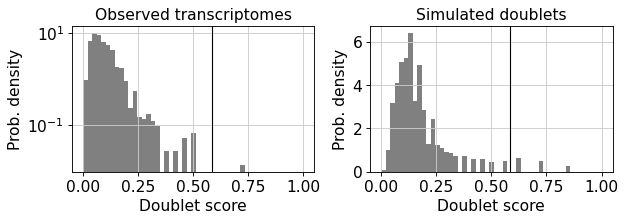

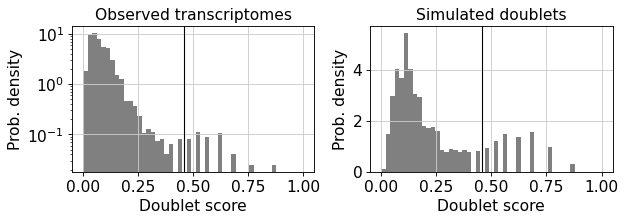

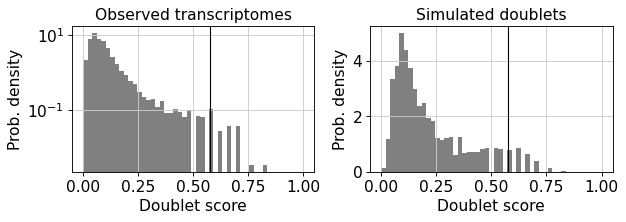

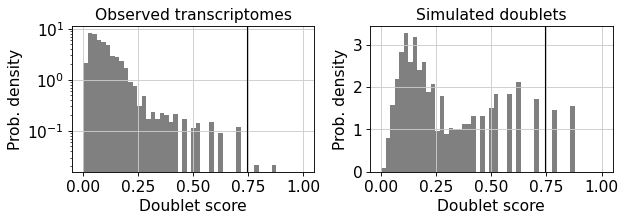

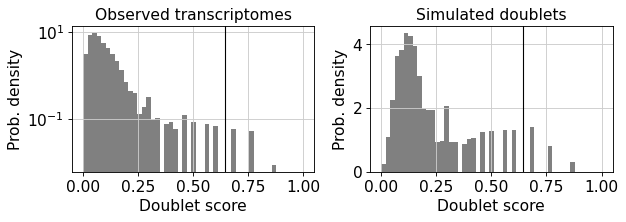

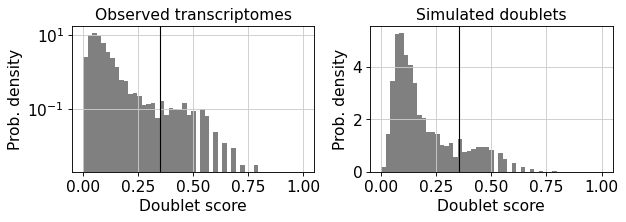

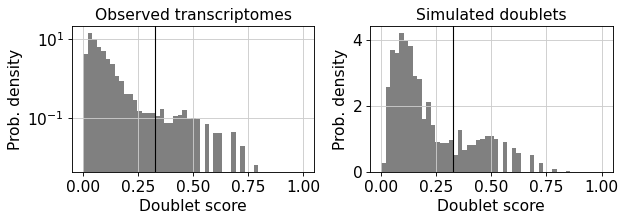

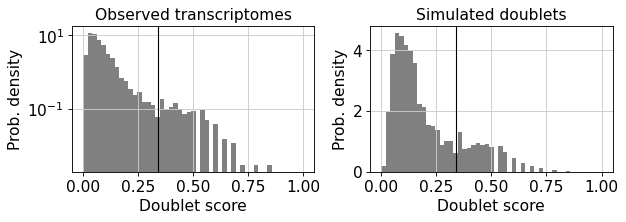

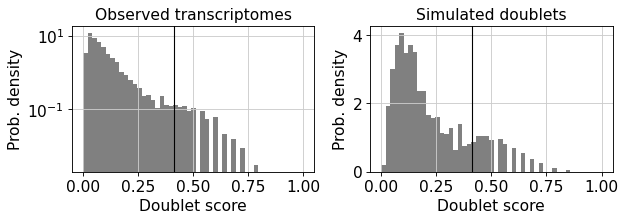

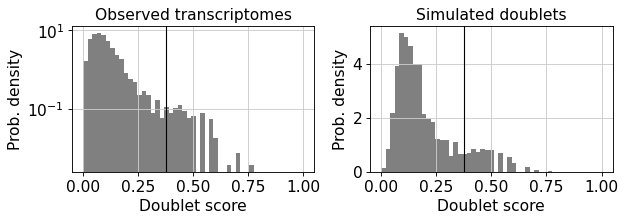

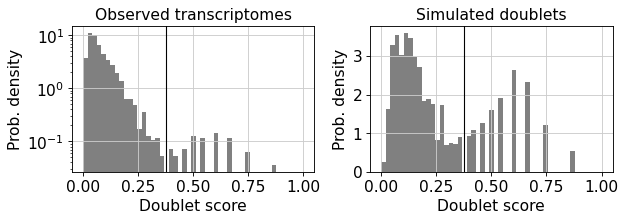

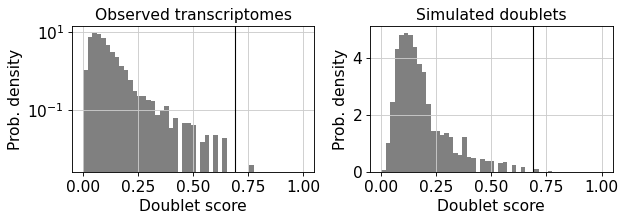

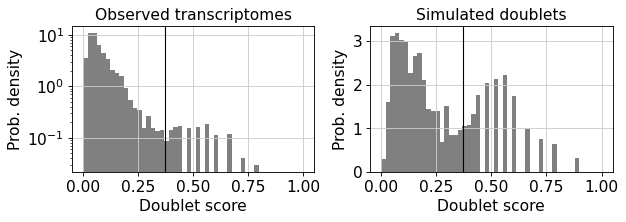

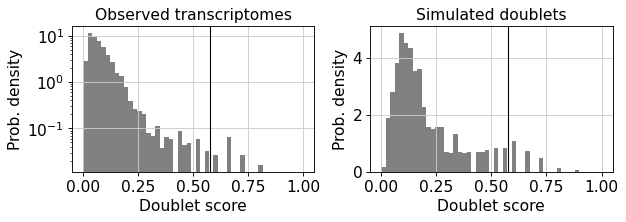

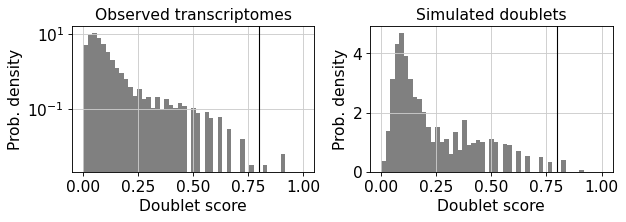

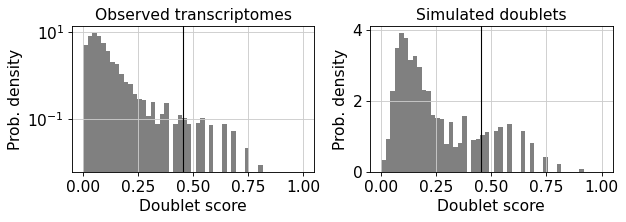

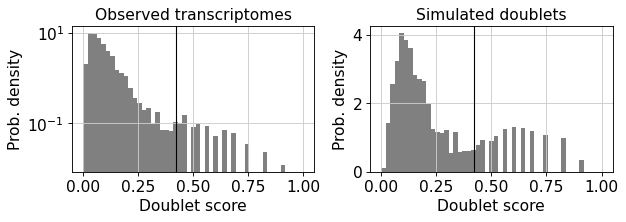

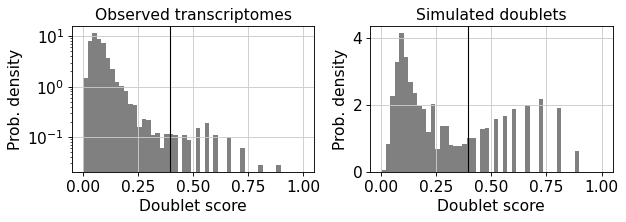

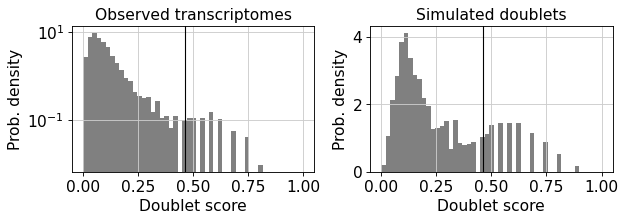

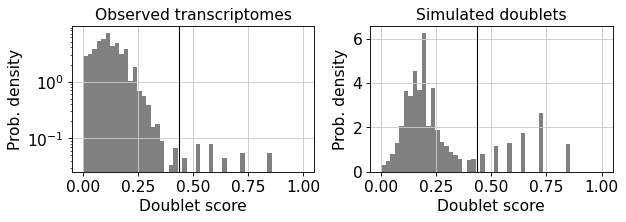

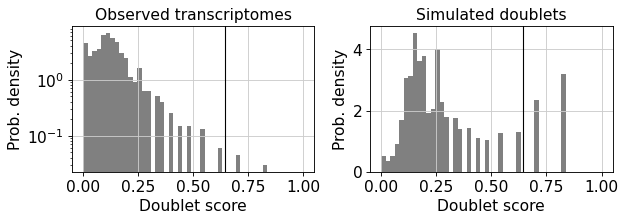

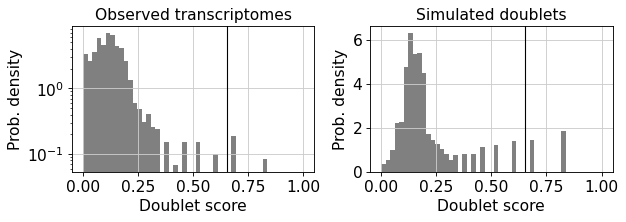

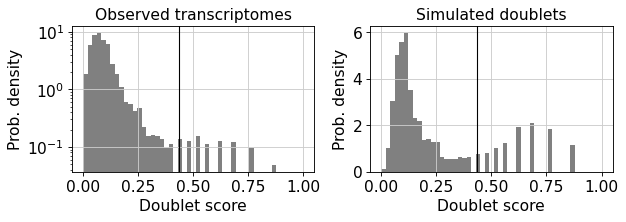

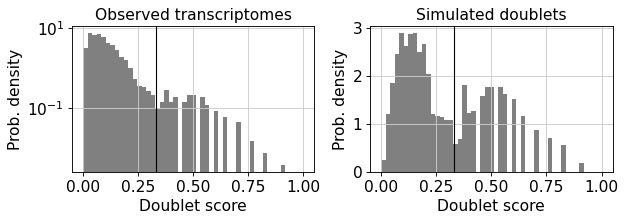

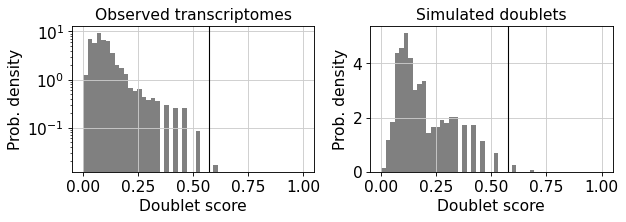

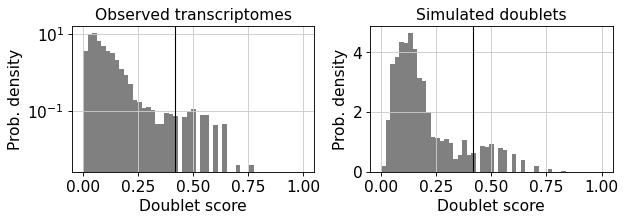

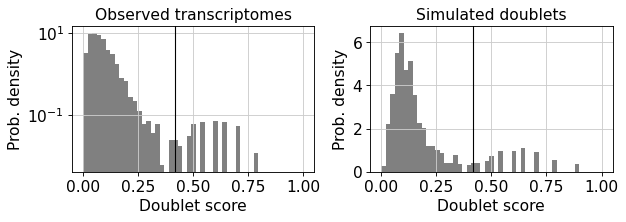

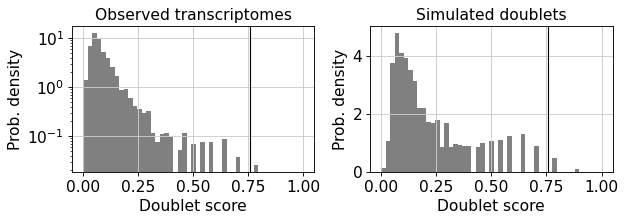

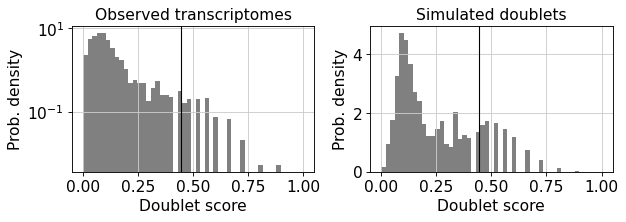

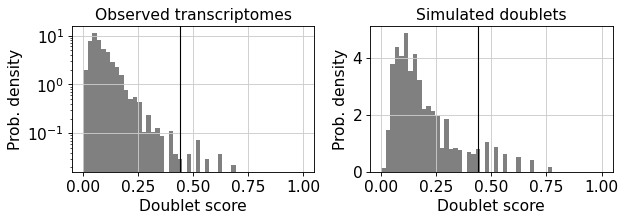

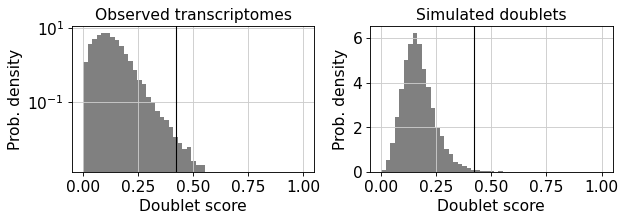

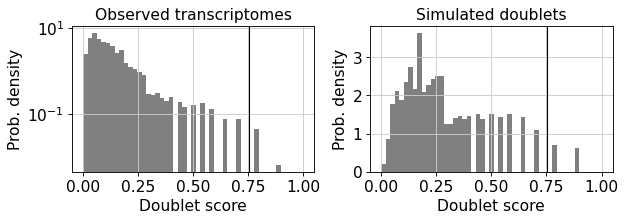

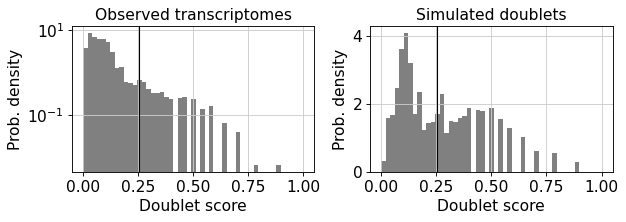

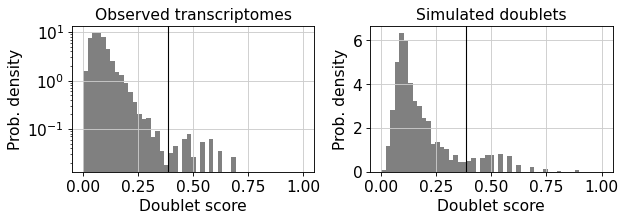

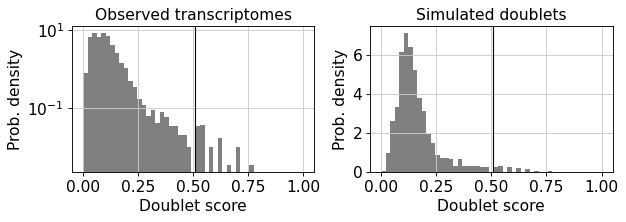

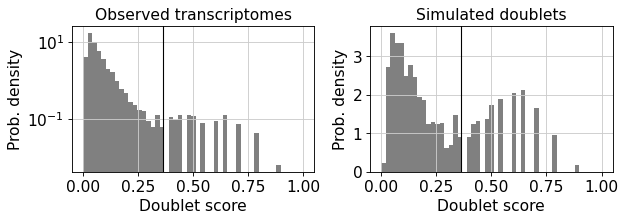

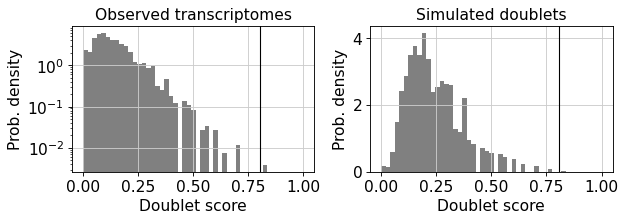

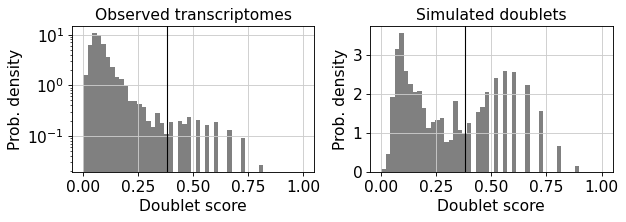

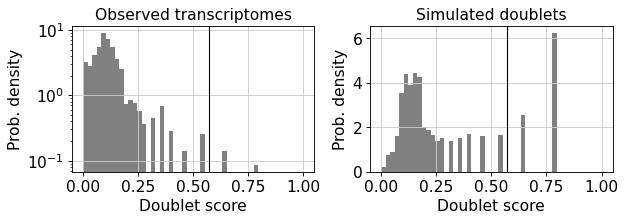

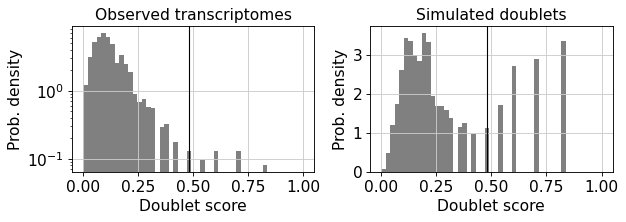

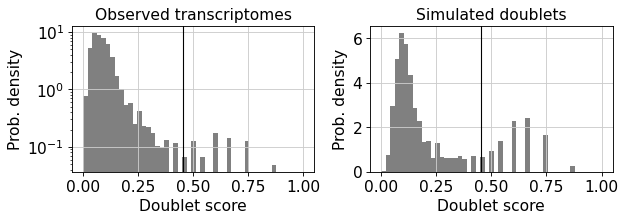

In [89]:
for i in range(len(adata)):
    scrub_obj[i].plot_histogram()

In [91]:
def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

64
['Healthy: Number of doublets = 1']
155
['Healthy: Number of doublets = 59']
556
['Healthy: Number of doublets = 64']
419
['Healthy: Number of doublets = 6']
178
['Healthy: Number of doublets = 14']
551
['Injured: Number of doublets = 350']
593
['Injured: Number of doublets = 419']
601
['Injured: Number of doublets = 371']
759
['Injured: Number of doublets = 270']
502
['Injured: Number of doublets = 189']
194
['Injured: Number of doublets = 89']
343
['Injured: Number of doublets = 1']
406
['Injured: Number of doublets = 231']
214
['Injured: Number of doublets = 25']
672
['Injured: Number of doublets = 3']
468
['Injured: Number of doublets = 139']
484
['Injured: Number of doublets = 196']
381
['Injured: Number of doublets = 197']
533
['Injured: Number of doublets = 150']
225
['Injured: Number of doublets = 32']
244
['Injured: Number of doublets = 5']
124
['Injured: Number of doublets = 16']
272
['Injured: Number of doublets = 98']
759
['Injured: Number of doublets = 512']
148
['Injur

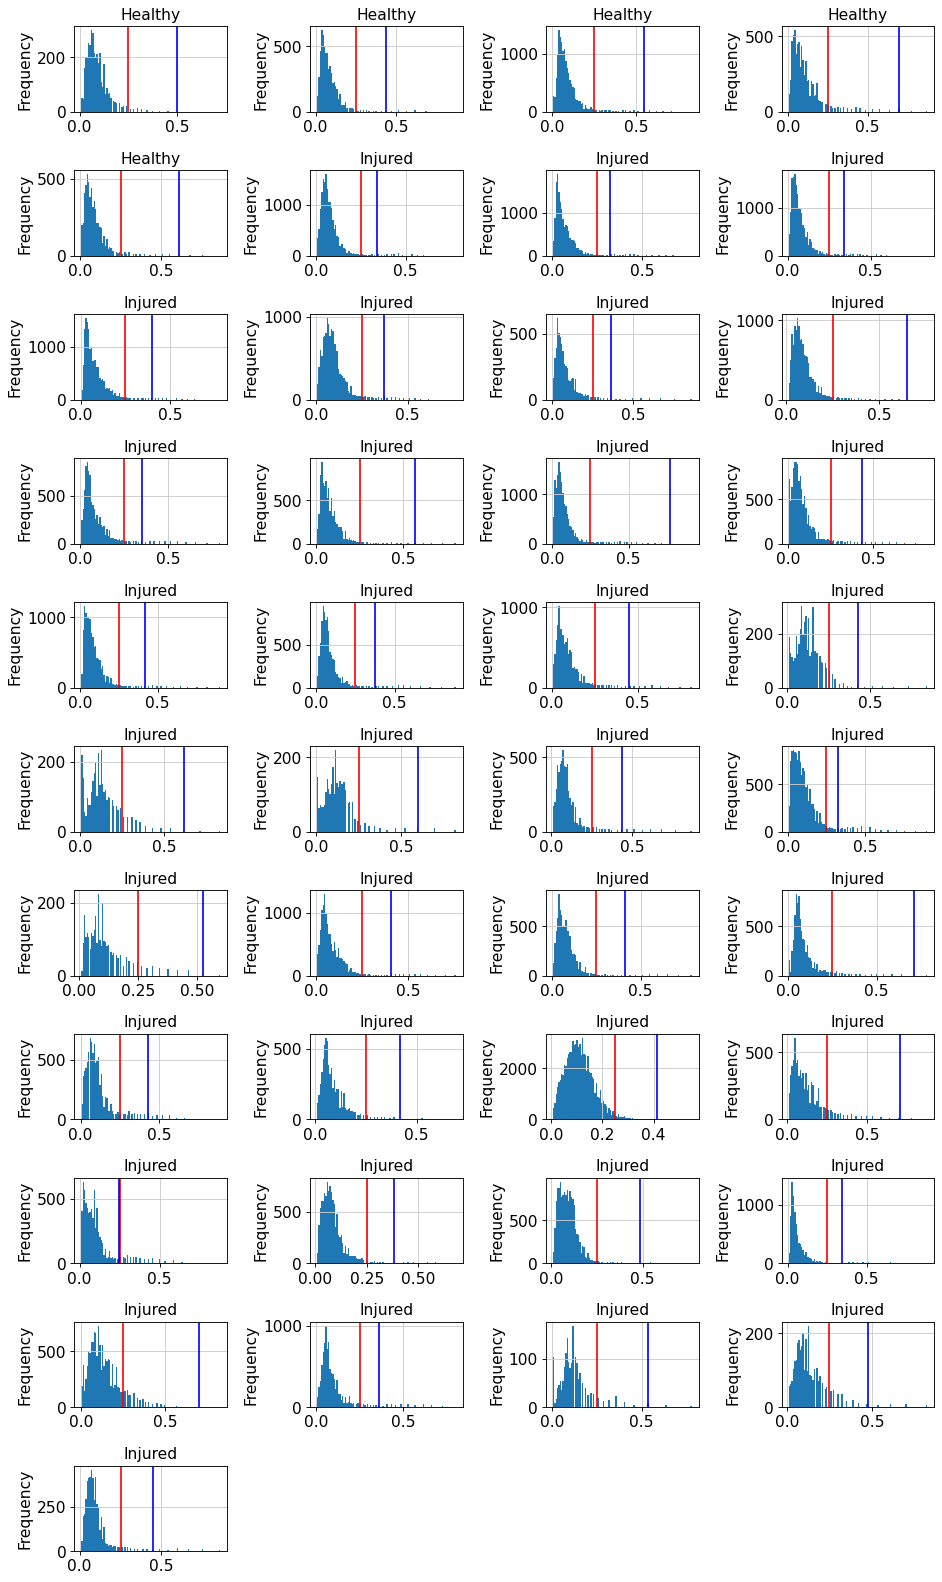

In [95]:
cutoffs = [0.25]*41

fig, ax = plt.subplots(11,4, figsize=(12,20))
ax = ax.flatten()
ax = trim_axs(ax, len(adata))
for i in range(len(adata)):    
    pd.DataFrame(adata[i].obs['db_scores']).plot.hist(bins=100, ax=ax[i])
    ax[i].axvline(x=cutoffs[i], color='r')
    ax[i].axvline(x=np.sort(adata[i].obs['db_scores'])[::-1][np.sum(adata[i].obs['predicted_db'])], color='b')
    ax[i].get_legend().remove()
    ax[i].set_title(adata[i].obs['Condition'][0])
    print(np.sum(adata[i].obs['db_scores'] > cutoffs[i]))
    print(np.unique(adata[i].obs['Condition'])+': Number of doublets = '+str(np.sum(adata[i].obs['predicted_db'])))
plt.tight_layout() 

In [96]:
for i in range(len(adata)):
    adata[i].obs['predicted_db'] = adata[i].obs['db_scores'] > cutoffs[i]

In [97]:
# remove doublets
for i in range(len(adata)):
    print(np.unique(adata[i].obs['Condition'])+str(adata[i].shape))
    adata[i] = adata[i][~adata[i].obs['predicted_db'],:].copy()
    print(np.unique(adata[i].obs['Condition'])+str(adata[i].shape))

['Healthy(3745, 31465)']
['Healthy(3681, 31465)']
['Healthy(6012, 31465)']
['Healthy(5857, 31465)']
['Healthy(14432, 31465)']
['Healthy(13876, 31465)']
['Healthy(6921, 31465)']
['Healthy(6502, 31465)']
['Healthy(5709, 31465)']
['Healthy(5531, 31465)']
['Injured(16587, 31465)']
['Injured(16036, 31465)']
['Injured(15684, 31465)']
['Injured(15091, 31465)']
['Injured(16420, 31465)']
['Injured(15819, 31465)']
['Injured(16146, 31465)']
['Injured(15387, 31465)']
['Injured(13480, 31465)']
['Injured(12978, 31465)']
['Injured(5504, 31465)']
['Injured(5310, 31465)']
['Injured(12801, 31465)']
['Injured(12458, 31465)']
['Injured(8401, 31465)']
['Injured(7995, 31465)']
['Injured(9103, 31465)']
['Injured(8889, 31465)']
['Injured(15105, 31465)']
['Injured(14433, 31465)']
['Injured(11410, 31465)']
['Injured(10942, 31465)']
['Injured(12230, 31465)']
['Injured(11746, 31465)']
['Injured(8856, 31465)']
['Injured(8475, 31465)']
['Injured(10774, 31465)']
['Injured(10241, 31465)']
['Injured(4388, 31465)']
['I

# QC

In [98]:
[x for x in adata[0].var_names if x.startswith('mt-')]

['mt-nd1',
 'mt-nd2',
 'mt-co1',
 'mt-co2',
 'mt-atp8',
 'mt-atp6',
 'mt-co3',
 'mt-nd3',
 'mt-nd4l',
 'mt-nd4',
 'mt-nd5',
 'mt-nd6',
 'mt-cyb']

In [99]:
for i in range(len(adata)):
    adata[i].var['mt'] = adata[i].var_names.str.startswith('mt-') 
    sc.pp.calculate_qc_metrics(adata[i], qc_vars=['mt'], inplace=True)

/nfs01data1/Groups/Wangxiaonan/programs/miniconda3/envs/scanpy171/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


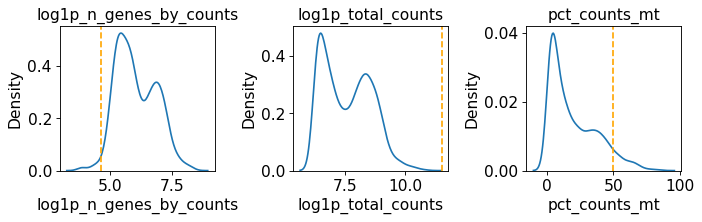

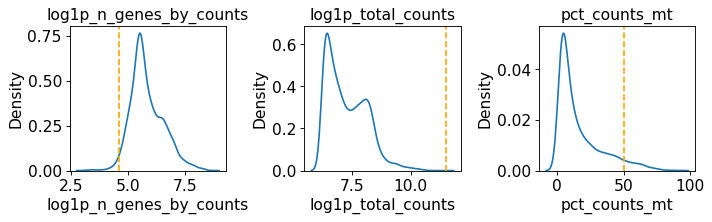

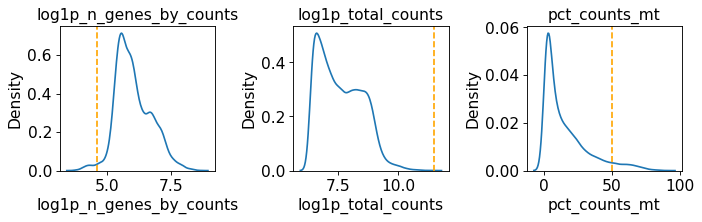

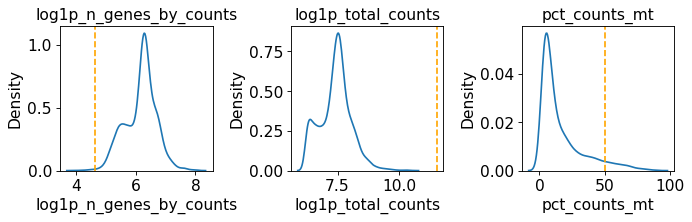

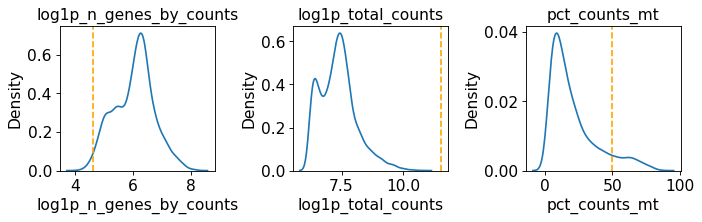

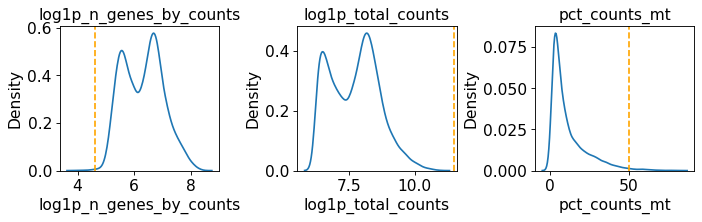

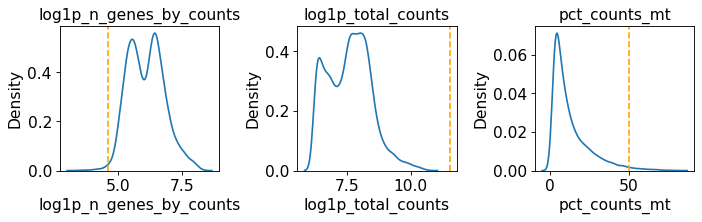

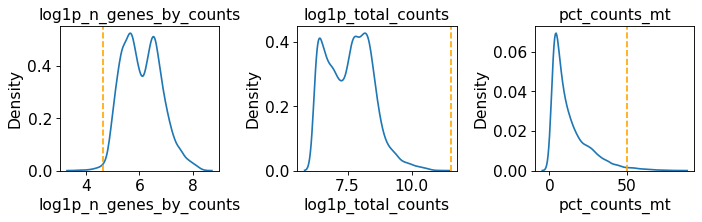

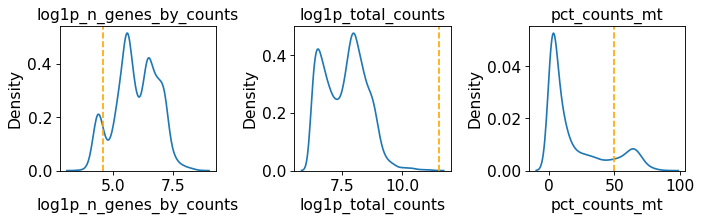

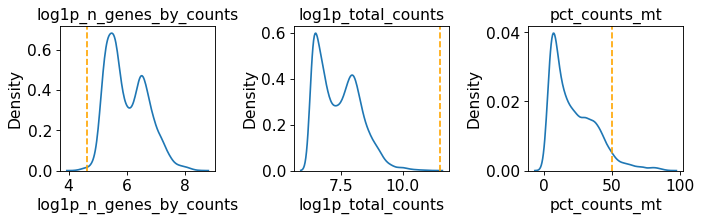

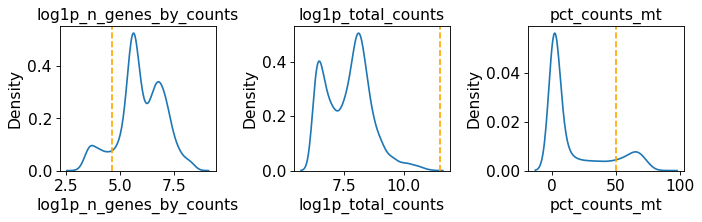

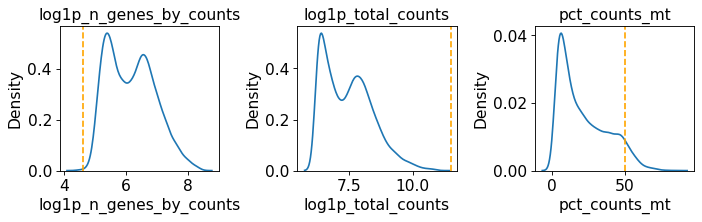

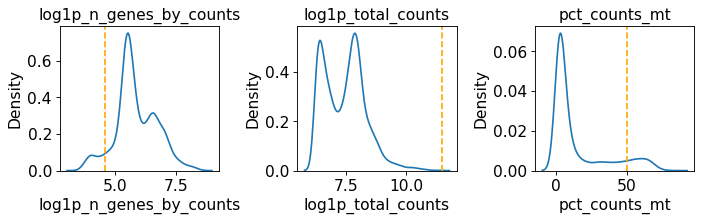

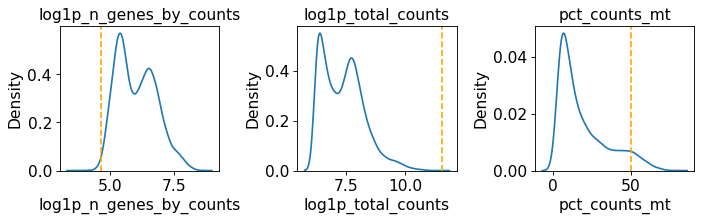

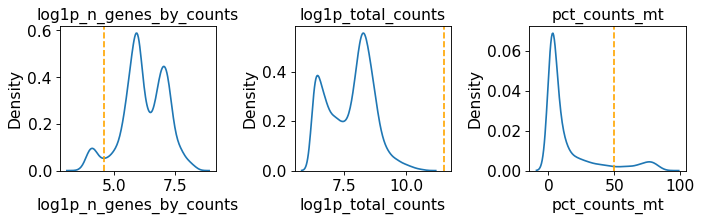

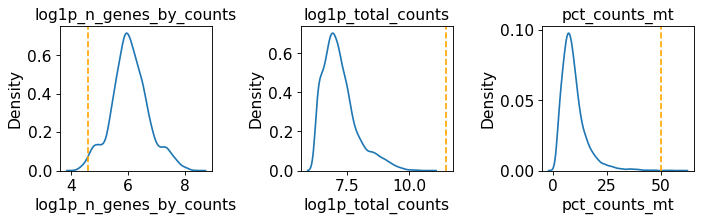

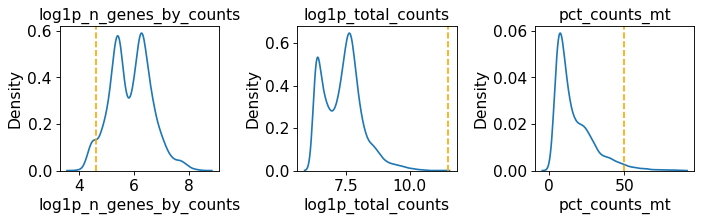

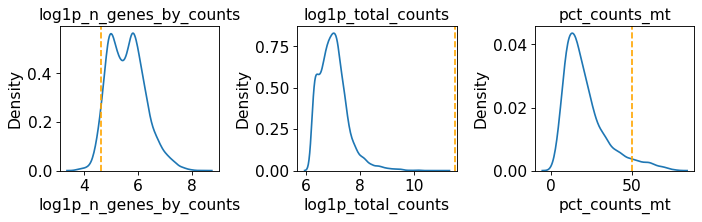

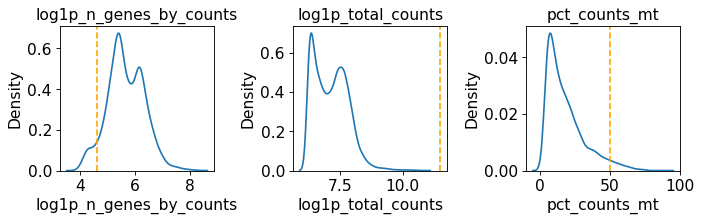

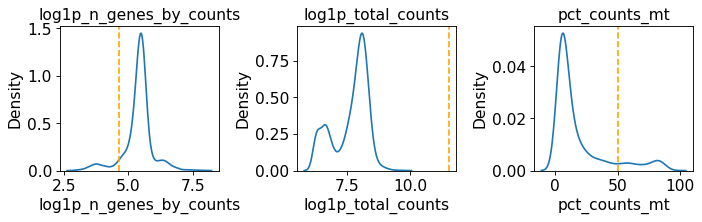

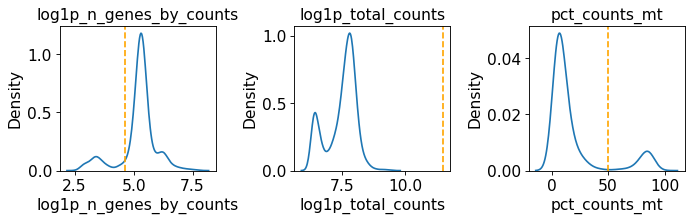

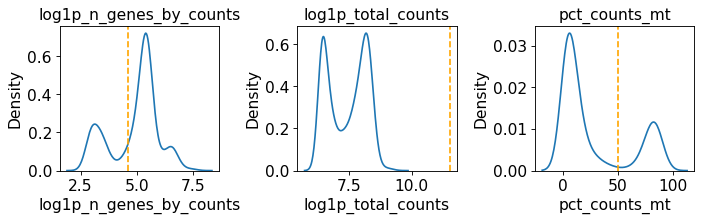

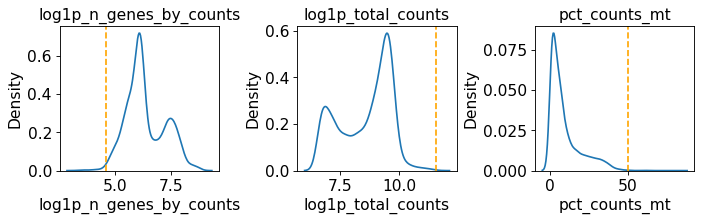

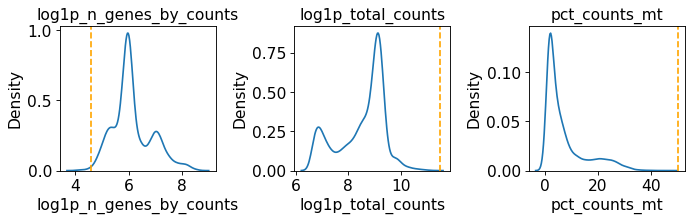

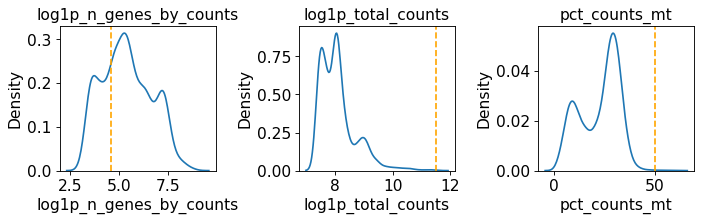

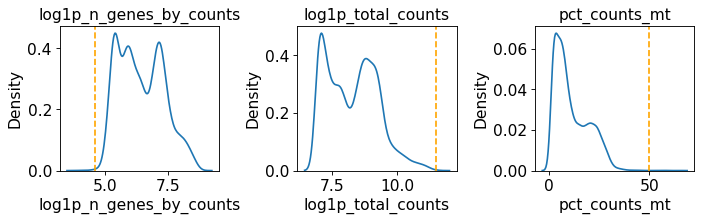

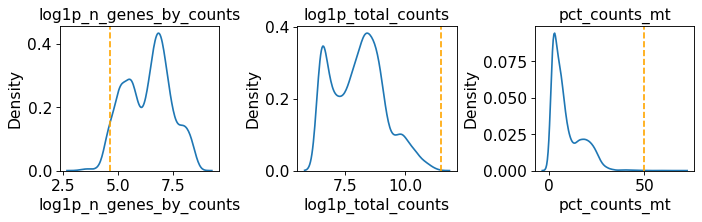

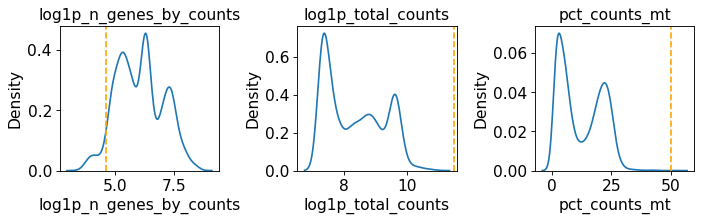

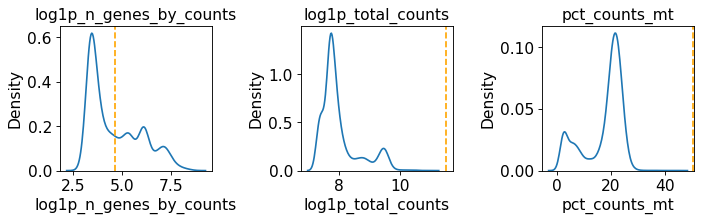

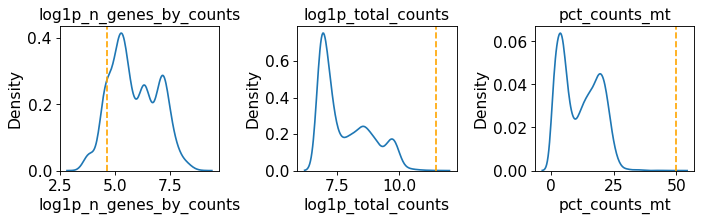

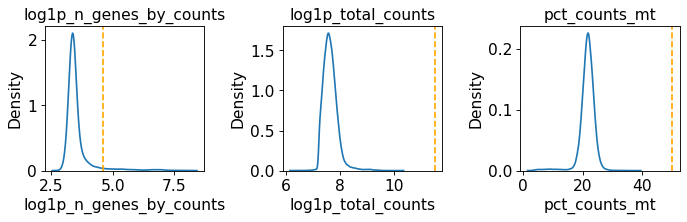

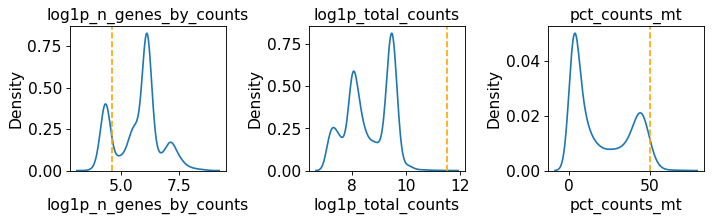

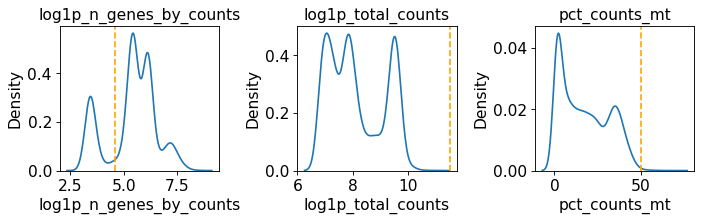

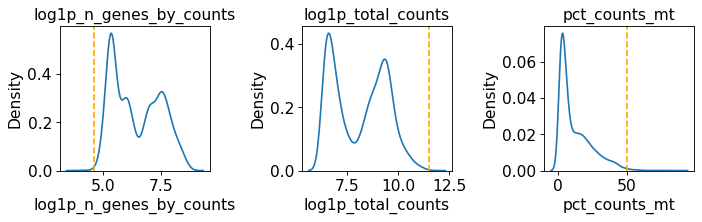

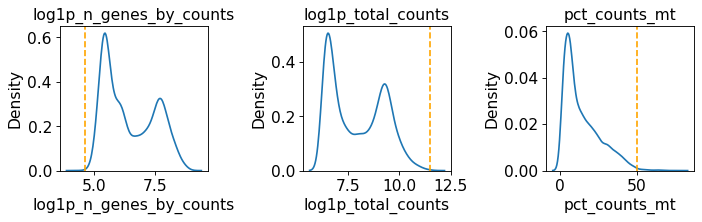

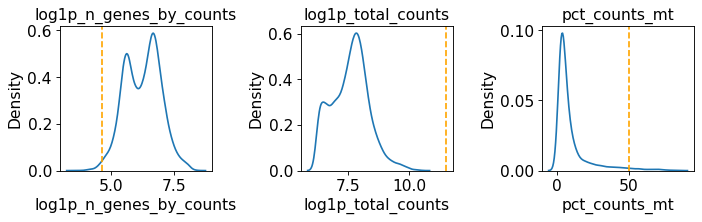

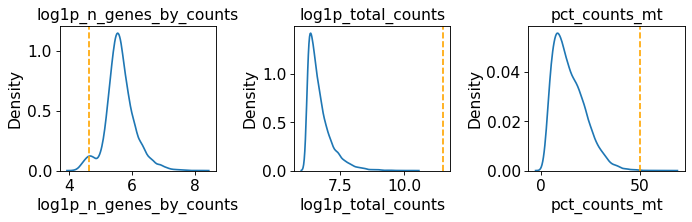

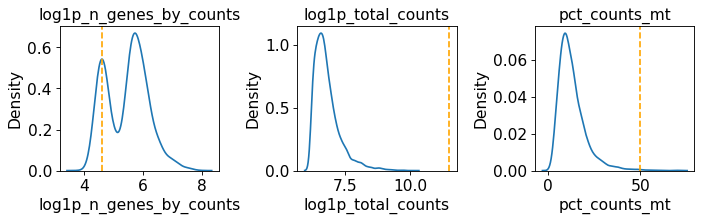

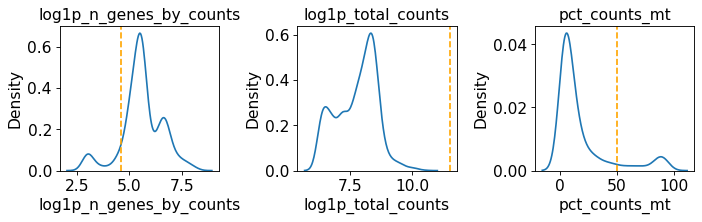

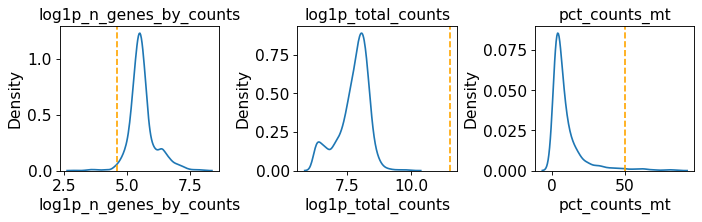

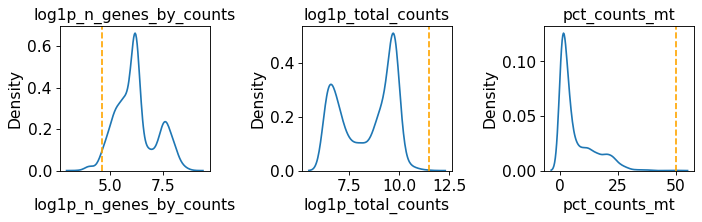

In [105]:
cutoffs = [[100,100000, np.exp(50)]]*41
for i in range(len(adata)):
    obs_terms = ['log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_mt']
    fig,ax = plt.subplots(1,3, figsize=(9,3))
    for j in range(len(obs_terms)):
        sns.kdeplot(adata[i].obs[obs_terms[j]], ax=ax[j])
        ax[j].grid(False)
        ax[j].set_title(obs_terms[j])
        ax[j].axvline(np.log1p(cutoffs[i][j]), c='orange', linestyle='--')
    plt.tight_layout()

In [108]:
for i in range(len(adata)):
    sc.pp.filter_cells(adata[i], min_genes=cutoffs[i][0])
    #sc.pp.filter_genes(adata[i], min_cells=1)
    adata[i] = adata[i][(adata[i].obs['total_counts'] <= cutoffs[i][1]) & (adata[i].obs['pct_counts_mt'] <= np.log(cutoffs[i][2])), :].copy()
    print(adata[i].obs['Condition'].value_counts().sort_index())

filtered out 60 cells that have less than 100 genes expressed
filtered out 110 cells that have less than 100 genes expressed


Healthy    3406
Name: Condition, dtype: int64
Healthy    5471
Name: Condition, dtype: int64


filtered out 224 cells that have less than 100 genes expressed
filtered out 20 cells that have less than 100 genes expressed
filtered out 60 cells that have less than 100 genes expressed


Healthy    13016
Name: Condition, dtype: int64
Healthy    6057
Name: Condition, dtype: int64
Healthy    5006
Name: Condition, dtype: int64


filtered out 23 cells that have less than 100 genes expressed
filtered out 104 cells that have less than 100 genes expressed


Injured    15817
Name: Condition, dtype: int64


filtered out 89 cells that have less than 100 genes expressed


Injured    14788
Name: Condition, dtype: int64


filtered out 1563 cells that have less than 100 genes expressed


Injured    15498
Name: Condition, dtype: int64


filtered out 35 cells that have less than 100 genes expressed


Injured    12812
Name: Condition, dtype: int64


filtered out 585 cells that have less than 100 genes expressed


Injured    12215
Name: Condition, dtype: int64
Injured    4420
Name: Condition, dtype: int64


filtered out 9 cells that have less than 100 genes expressed
filtered out 578 cells that have less than 100 genes expressed
filtered out 34 cells that have less than 100 genes expressed


Injured    11604
Name: Condition, dtype: int64
Injured    7044
Name: Condition, dtype: int64


filtered out 911 cells that have less than 100 genes expressed


Injured    8255
Name: Condition, dtype: int64


filtered out 128 cells that have less than 100 genes expressed


Injured    12921
Name: Condition, dtype: int64
Injured    10805
Name: Condition, dtype: int64


filtered out 534 cells that have less than 100 genes expressed
filtered out 387 cells that have less than 100 genes expressed
filtered out 628 cells that have less than 100 genes expressed


Injured    10911
Name: Condition, dtype: int64
Injured    7757
Name: Condition, dtype: int64
Injured    9247
Name: Condition, dtype: int64


filtered out 306 cells that have less than 100 genes expressed
filtered out 386 cells that have less than 100 genes expressed
filtered out 781 cells that have less than 100 genes expressed
filtered out 39 cells that have less than 100 genes expressed


Injured    3659
Name: Condition, dtype: int64
Injured    2651
Name: Condition, dtype: int64
Injured    1972
Name: Condition, dtype: int64


filtered out 57 cells that have less than 100 genes expressed


Injured    5801
Name: Condition, dtype: int64


filtered out 789 cells that have less than 100 genes expressed


Injured    12142
Name: Condition, dtype: int64
Injured    1985
Name: Condition, dtype: int64


filtered out 12 cells that have less than 100 genes expressed
filtered out 341 cells that have less than 100 genes expressed


Injured    12698
Name: Condition, dtype: int64


filtered out 335 cells that have less than 100 genes expressed
filtered out 4858 cells that have less than 100 genes expressed


Injured    7766
Name: Condition, dtype: int64
Injured    7055
Name: Condition, dtype: int64


filtered out 746 cells that have less than 100 genes expressed
filtered out 70653 cells that have less than 100 genes expressed


Injured    3483
Name: Condition, dtype: int64
Injured    5705
Name: Condition, dtype: int64


filtered out 1509 cells that have less than 100 genes expressed
filtered out 1477 cells that have less than 100 genes expressed


Injured    3183
Name: Condition, dtype: int64
Injured    5380
Name: Condition, dtype: int64
Injured    5251
Name: Condition, dtype: int64


filtered out 8 cells that have less than 100 genes expressed


Injured    10649
Name: Condition, dtype: int64


filtered out 2 cells that have less than 100 genes expressed
filtered out 56 cells that have less than 100 genes expressed


Injured    13970
Name: Condition, dtype: int64


filtered out 288 cells that have less than 100 genes expressed
filtered out 1420 cells that have less than 100 genes expressed


Injured    7497
Name: Condition, dtype: int64
Injured    11153
Name: Condition, dtype: int64


filtered out 162 cells that have less than 100 genes expressed
filtered out 43 cells that have less than 100 genes expressed
filtered out 127 cells that have less than 100 genes expressed


Injured    7272
Name: Condition, dtype: int64
Injured    1427
Name: Condition, dtype: int64
Injured    2741
Name: Condition, dtype: int64
Injured    4784
Name: Condition, dtype: int64


In [109]:
for i in range(len(adata)):
    print(adata[i].shape)

(3406, 31465)
(5471, 31465)
(13016, 31465)
(6057, 31465)
(5006, 31465)
(15817, 31465)
(14788, 31465)
(15498, 31465)
(12812, 31465)
(12215, 31465)
(4420, 31465)
(11604, 31465)
(7044, 31465)
(8255, 31465)
(12921, 31465)
(10805, 31465)
(10911, 31465)
(7757, 31465)
(9247, 31465)
(3659, 31465)
(2651, 31465)
(1972, 31465)
(5801, 31465)
(12142, 31465)
(1985, 31465)
(12698, 31465)
(7766, 31465)
(7055, 31465)
(3483, 31465)
(5705, 31465)
(3183, 31465)
(5380, 31465)
(5251, 31465)
(10649, 31465)
(13970, 31465)
(7497, 31465)
(11153, 31465)
(7272, 31465)
(1427, 31465)
(2741, 31465)
(4784, 31465)


In [110]:
#combine and save the raw counts
adata1 = anndata.AnnData.concatenate(*adata)

In [111]:
adata1.shape

(325274, 31465)

In [112]:
sc.pp.filter_genes(adata1, min_cells=1)

filtered out 4674 genes that are detected in less than 1 cells


In [113]:
adata1.write('./write/GSE159032_GSE158919_raw.h5ad')

... storing 'Index' as categorical
... storing 'Age' as categorical
... storing 'Development_stage' as categorical
... storing 'Condition' as categorical
... storing 'Strain' as categorical
... storing 'Tissue' as categorical
... storing 'StudyID' as categorical
... storing 'CellType' as categorical
... storing 'Genotype' as categorical
... storing 'Organism' as categorical
... storing 'Gender' as categorical
... storing 'Author' as categorical
... storing 'FishID' as categorical
... storing 'Treatment' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


# Normalisation

In [114]:
adata = sc.read('./write/GSE159032_GSE158919_raw.h5ad')

In [115]:
print(adata.shape)

(325274, 26791)


In [117]:
# normalisation
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

normalizing by total count per cell
    finished (0:00:03): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [118]:
# log counts
sc.pp.log1p(adata)

In [119]:
adata.raw = adata

In [120]:
print(adata.shape)

(325274, 26791)


In [121]:
adata.write('./write/GSE159032_GSE158919_lognorm.h5ad')

# Cell Cycle Assignment

In [122]:
adata = sc.read('./write/GSE159032_GSE158919_lognorm.h5ad')

In [123]:
print(adata.shape)

(325274, 26791)


In [124]:
cell_cycle_genes = [x.strip()[0].upper()+x.strip()[1:].lower() for x in open('/nfs01data1/Groups/Wangxiaonan/Lab_members/Files/regev_lab_cell_cycle_genes.txt')]
print(len(cell_cycle_genes))

97


In [125]:
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
print(len(s_genes))
print(len(g2m_genes))

43
54


In [126]:
GN = pd.read_csv('../drerio_mmusculus.txt', delimiter='\t', index_col=0)

In [127]:
SGo = np.intersect1d(s_genes, [str(x) for x in GN['mmusculus_homolog_associated_gene_name']])
Stab = GN[np.in1d([str(x) for x in GN['mmusculus_homolog_associated_gene_name']], SGo)]
G2Mo = np.intersect1d(g2m_genes, [str(x) for x in GN['mmusculus_homolog_associated_gene_name']])
G2Mtab = GN[np.in1d([str(x) for x in GN['mmusculus_homolog_associated_gene_name']], G2Mo)]

In [128]:
sg_drerio = np.unique([str(x) for x in Stab['external_gene_name']])
g2mg_drerio = np.unique([str(x) for x in G2Mtab['external_gene_name']])
print(len(sg_drerio))
print(len(g2mg_drerio))

40
51


In [129]:
sg_drerio_ol = np.intersect1d(sg_drerio, adata.raw.var_names)
g2mg_drerio_ol = np.intersect1d(g2mg_drerio, adata.raw.var_names)
print(len(sg_drerio_ol))
print(len(g2mg_drerio_ol))

40
51


In [130]:
Index = adata.obs['Index'].cat.categories
print(Index)

Index(['GSM4815755', 'GSM4815756', 'GSM4815757', 'GSM4815758', 'GSM4815759',
       'GSM4815760', 'GSM4817928', 'GSM4817929', 'GSM4817930', 'GSM4817931',
       'GSM4817932', 'GSM4817933', 'GSM4817934', 'GSM4817935', 'GSM4817936',
       'GSM4817937', 'GSM4817938', 'GSM4817939', 'GSM4817940', 'GSM4817941',
       'GSM4817942', 'GSM4817943', 'GSM4817944', 'GSM4817945', 'GSM4817946',
       'GSM4817947', 'GSM4817948', 'GSM4817949', 'GSM4817950', 'GSM4817951',
       'GSM4817952', 'GSM4817953', 'GSM4817954', 'GSM4817955', 'GSM4817956',
       'GSM4817957', 'GSM4817958', 'GSM4817959', 'GSM4817960', 'GSM4817961',
       'GSM4817962'],
      dtype='object')


In [131]:
phase = []
for i in range(len(Index)):
    adata_sub = adata[adata.obs['Index'] == Index[i]].copy()
    print(adata_sub.shape)
    sc.pp.scale(adata_sub)
    sc.tl.score_genes_cell_cycle(adata_sub, s_genes=sg_drerio, g2m_genes=g2mg_drerio, use_raw=False)
    phase.append(adata_sub.obs[['phase', 'S_score', 'G2M_score']])

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(7497, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    678 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    645 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(11153, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    600 total control genes are used. (0:00:02)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    634 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(7272, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    639 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    597 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(1427, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    517 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    597 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(2741, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    519 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    559 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(4784, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    678 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    636 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(3406, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    599 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    558 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(5471, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    640 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    679 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(13016, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    760 total control genes are used. (0:00:02)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    719 total control genes are used. (0:00:02)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(6057, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    637 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    518 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(5006, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    638 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    638 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(15817, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    679 total control genes are used. (0:00:03)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    756 total control genes are used. (0:00:03)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(14788, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    719 total control genes are used. (0:00:02)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    679 total control genes are used. (0:00:02)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(15498, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    720 total control genes are used. (0:00:04)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    714 total control genes are used. (0:00:03)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(12812, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    759 total control genes are used. (0:00:02)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    718 total control genes are used. (0:00:02)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(12215, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    638 total control genes are used. (0:00:02)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    646 total control genes are used. (0:00:02)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(4420, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    598 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    678 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(11604, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    518 total control genes are used. (0:00:02)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    757 total control genes are used. (0:00:02)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(7044, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    718 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    678 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(8255, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    638 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    715 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(12921, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    638 total control genes are used. (0:00:02)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    678 total control genes are used. (0:00:02)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(10805, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    680 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    719 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(10911, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    677 total control genes are used. (0:00:02)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    678 total control genes are used. (0:00:02)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(7757, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    639 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    598 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(9247, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    559 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    678 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(3659, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    480 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    516 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(2651, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    520 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    560 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(1972, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    439 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    480 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(5801, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    635 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    719 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(12142, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    679 total control genes are used. (0:00:02)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    795 total control genes are used. (0:00:02)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(1985, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    560 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    556 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(12698, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    639 total control genes are used. (0:00:02)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    678 total control genes are used. (0:00:02)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(7766, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    558 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    679 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(7055, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    638 total control genes are used. (0:00:04)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    720 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(3483, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    677 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    638 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(5705, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    599 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    720 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(3183, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    639 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    637 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(5380, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    640 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    597 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(5251, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    598 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    640 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(10649, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    800 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    718 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(13970, 26791)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    679 total control genes are used. (0:00:02)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    758 total control genes are used. (0:00:02)
-->     'phase', cell cycle phase (adata.obs)


In [132]:
phase_pd = pd.concat(phase)

In [133]:
phase_pd.head()

phase   S_score  G2M_score
AAACCTGAGACAAAGG-1-35    G1 -0.064604  -0.027538
AAACCTGAGACAGAGA-1-35   G2M -0.079252   0.199934
AAACCTGAGCCCAATT-1-35     S  0.101796  -0.026710
AAACCTGAGGGCACTA-1-35    G1 -0.066554  -0.044313
AAACCTGCAAAGGCGT-1-35   G2M -0.042689   0.238153

In [134]:
print(phase_pd.shape)

(325274, 3)


In [135]:
phase_pd.to_csv('cell_cycle_results.txt')

# Select highly variable genes

In [136]:
adata = sc.read('./write/GSE159032_GSE158919_lognorm.h5ad')

In [137]:
cell_cycle_results = pd.read_csv('cell_cycle_results.txt', index_col=0)
adata.obs = pd.concat([adata.obs, cell_cycle_results], axis=1)

In [138]:
adata.obs.head(3)

Index    Age Development_stage Condition  Day  \
AAACCTGAGACTACAA-1-0  GSM4817928  4-12m             adult   Healthy    0   
AAACCTGAGCACGCCT-1-0  GSM4817928  4-12m             adult   Healthy    0   
AAACCTGAGGATGTAT-1-0  GSM4817928  4-12m             adult   Healthy    0   

                          Strain Tissue    StudyID   CellType Genotype  ...  \
AAACCTGAGACTACAA-1-0  Zebrabow M  heart  GSE159032  All cells       WT  ...   
AAACCTGAGCACGCCT-1-0  Zebrabow M  heart  GSE159032  All cells       WT  ...   
AAACCTGAGGATGTAT-1-0  Zebrabow M  heart  GSE159032  All cells       WT  ...   

                     pct_counts_in_top_500_genes total_counts_mt  \
AAACCTGAGACTACAA-1-0                  100.000000           195.0   
AAACCTGAGCACGCCT-1-0                   90.855974           261.0   
AAACCTGAGGATGTAT-1-0                   83.813995           501.0   

                     log1p_total_counts_mt pct_counts_mt n_genes  batch  \
AAACCTGAGACTACAA-1-0              5.278115     17.535971     337      0   
AAACCTGAGCACGCCT-1-0              5.568345      7.624891     813      0   
AAACCTGAGGATGTAT-1-0              6.218600      5.600268    1753      0   

                          n_counts  phase   S_score  G2M_score  
AAACCTGAGACTACAA-1-0  10000.000977     G1 -0.039037  -0.054399  
AAACCTGAGCACGCCT-1-0  10000.000000    G2M -0.153666   0.080794  
AAACCTGAGGATGTAT-1-0  10000.000000     G1 -0.119039  -0.095550  

[3 rows x 35 columns]

In [139]:
# find highly variable genes
# parameters are mainly selected depends on user preference
sc.pp.highly_variable_genes(
    adata, min_mean=0.02, max_mean=3, min_disp=0.3, batch_key='batch', inplace=True)

extracting highly variable genes
... storing 'phase' as categorical
    finished (0:00:20)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


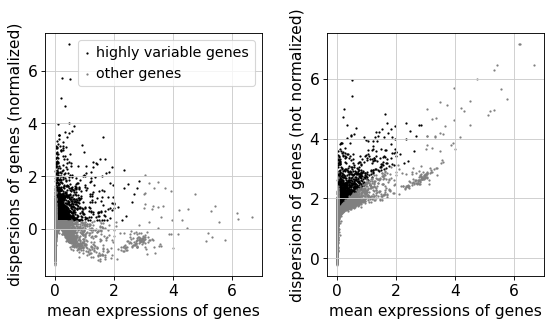

In [140]:
sc.pl.highly_variable_genes(adata)

In [141]:
print(np.sum(adata.var.highly_variable))

4768


In [142]:
adata = adata[:, adata.var.highly_variable].copy()

In [143]:
adata.write('./write/GSE159032_GSE158919_lognorm_hvg.h5ad')

# Preliminary processing

In [144]:
adata =sc.read('./write/GSE159032_GSE158919_lognorm_hvg.h5ad')

In [145]:
# normally regress out the top layers of unwanted effects
sc.pp.regress_out(adata, ['total_counts','n_genes_by_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'n_genes_by_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:40:35)


In [146]:
# scale for pca
sc.pp.scale(adata)
# pca
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:56)


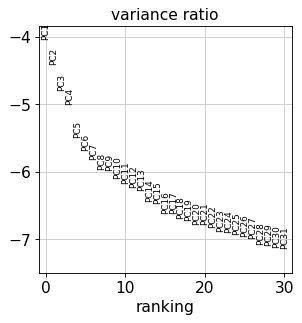

In [147]:
sc.pl.pca_variance_ratio(adata, log=True)

In [148]:
sc.pp.neighbors(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:57)


In [149]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:06:53)


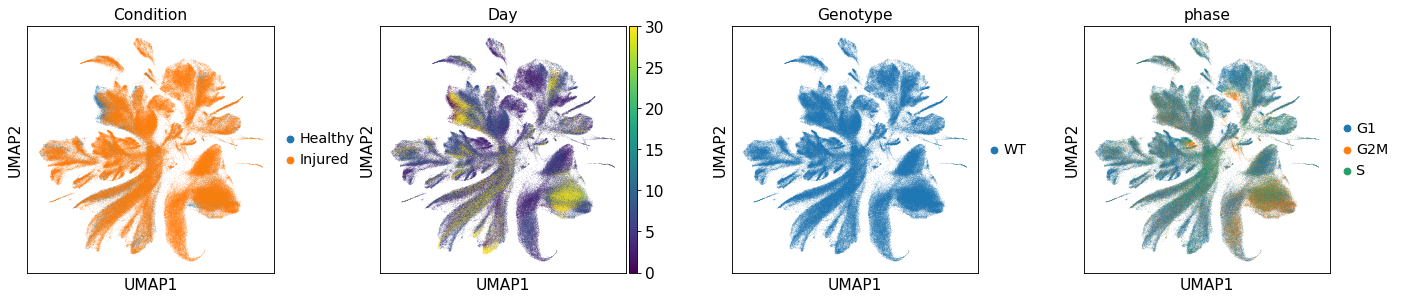

In [150]:
sc.pl.umap(adata, color= ['Condition', 'Day', 'Genotype', 'phase'], wspace=0.3)

In [151]:
adata.write('./write/GSE159032_GSE158919_processed.h5ad')

In [3]:
print(adata.obs_keys())

['Index', 'Age', 'Development_stage', 'Condition', 'Day', 'Strain', 'Tissue', 'StudyID', 'CellType', 'Genotype', 'Organism', 'Gender', 'Author', 'FishID', 'Treatment', 'RFP', 'db_scores', 'predicted_db', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'batch', 'n_counts', 'phase', 'S_score', 'G2M_score']


In [46]:
adata = sc.read('./write/GSE159032_GSE158919_processed.h5ad')

In [28]:
# match FishID
FishID = np.array(adata.obs.FishID.values)
FishID[np.in1d(adata.obs.Tissue.values,'Atrium')] = [x+'a' for x in FishID[np.in1d(adata.obs.Tissue.values,'Atrium')]]
FishID[np.in1d(adata.obs.Tissue.values,'Ventricle')] = [x+'v' for x in FishID[np.in1d(adata.obs.Tissue.values,'Ventricle')]]
FishID[np.in1d(adata.obs.Index.values,'GSM4817934')] = [x+'a' for x in FishID[np.in1d(adata.obs.Index.values,'GSM4817934')]]
FishID[np.in1d(adata.obs.Index.values,'GSM4817935')] = [x+'b' for x in FishID[np.in1d(adata.obs.Index.values,'GSM4817935')]]

In [47]:
adata.obs['FishID_new'] = FishID

In [32]:
adata.obs['FishID_new'].value_counts().index

Index(['Hr1', 'Hr2b', 'Hr2a', 'Hr35', 'H7', 'Hr9', 'Hr3', 'Hr26', 'Hr4',
       'Hr24', 'Hr6v', 'Hr11', 'Hr12', 'Hr10', 'Hr34', 'Hr14', 'Hr7v', 'Hr27',
       'Hr13', 'Hr8', 'Hr15', 'Hr28', 'Hr7a', 'H8a', 'Hr22', 'Hr30', 'H6',
       'Hr32', 'Hr33', 'H8v', 'Hr23', 'Hr6a', 'Hr19', 'Hr29', 'H5', 'Hr31',
       'Hr18', 'Hr20', 'Hr25', 'Hr21', 'Hr16'],
      dtype='object')

In [5]:
anno = pd.read_csv('Heart_regeneration/Data/final_celltypes.tsv')

In [6]:
anno.head()

Cell orig.ident  nCount_RNA  nFeature_RNA  percent.mito  \
0  H5_AAACCTGAGACTACAA         H5        1112           337     17.535971   
1  H5_AAACGGGAGGCGCTCT         H5         834           366      6.714628   
2  H5_AAAGATGAGATCCCAT         H5        1604           510      1.807980   
3  H5_AAAGATGCATCAGTCA         H5        3244           577      4.562269   
4  H5_AAAGATGTCGATAGAA         H5        1079           426      7.321594   

   time morphine          AV inhib so.far.ident.subtypes  ...     paper.ident  \
0  Ctrl     Ctrl  Wholeheart   NaN                Atrium  ...  Cardiomyocytes   
1  Ctrl     Ctrl  Wholeheart   NaN                Atrium  ...  Cardiomyocytes   
2  Ctrl     Ctrl  Wholeheart   NaN                Atrium  ...  Cardiomyocytes   
3  Ctrl     Ctrl  Wholeheart   NaN                Atrium  ...  Cardiomyocytes   
4  Ctrl     Ctrl  Wholeheart   NaN                Atrium  ...  Cardiomyocytes   

   RNA_snn_res.2  RNA_snn_res.3 RNA_snn_res.3.5     work.ident2  \
0             19             10              10  Cardiomyocytes   
1             14             35              27  Cardiomyocytes   
2             31             23              27  Cardiomyocytes   
3             14             23              27  Cardiomyocytes   
4             14             35              27  Cardiomyocytes   

        work.ident3        final.zoom     lineage.ident  \
0  Cardiomyocytes A  Cardiomyocytes A  Cardiomyocytes A   
1  Cardiomyocytes A  Cardiomyocytes A  Cardiomyocytes A   
2  Cardiomyocytes A  Cardiomyocytes A  Cardiomyocytes A   
3  Cardiomyocytes A  Cardiomyocytes A  Cardiomyocytes A   
4  Cardiomyocytes A  Cardiomyocytes A  Cardiomyocytes A   

                 Cell_type              Cell_name  
0  Cardiomyocytes (Atrium)  ndH5_AAACCTGAGACTACAA  
1  Cardiomyocytes (Atrium)  ndH5_AAACGGGAGGCGCTCT  
2  Cardiomyocytes (Atrium)  ndH5_AAAGATGAGATCCCAT  
3  Cardiomyocytes (Atrium)  ndH5_AAAGATGCATCAGTCA  
4  Cardiomyocytes (Atrium)  ndH5_AAAGATGTCGATAGAA  

[5 rows x 31 columns]

In [7]:
anno.index = anno['Cell']

In [8]:
didx = adata.obs['FishID_new'].value_counts().index

In [9]:
print(didx)

CategoricalIndex(['Hr1', 'Hr2b', 'Hr2a', 'Hr35', 'H7', 'Hr9', 'Hr3', 'Hr26',
                  'Hr4', 'Hr24', 'Hr6v', 'Hr11', 'Hr12', 'Hr10', 'Hr34',
                  'Hr14', 'Hr7v', 'Hr27', 'Hr13', 'Hr8', 'Hr15', 'Hr28',
                  'Hr7a', 'H8a', 'Hr22', 'Hr30', 'H6', 'Hr32', 'Hr33', 'H8v',
                  'Hr23', 'Hr6a', 'Hr19', 'Hr29', 'H5', 'Hr31', 'Hr18', 'Hr20',
                  'Hr25', 'Hr21', 'Hr16'],
                 categories=['H5', 'H6', 'H7', 'H8a', 'H8v', 'Hr1', 'Hr2a', 'Hr2b', ...], ordered=False, dtype='category')


In [10]:
origidx = anno['orig.ident'].value_counts().index

In [11]:
print(origidx)

Index(['Hr1', 'Hr2b', 'Hr2a', 'Hr10', 'Hr11', 'Hr9', 'Hr3', 'H7', 'Hr26',
       'Hr6v', 'Hr4', 'Hr35', 'Hr12', 'Hr27', 'Hr34', 'Hr8', 'Hr7v', 'Hr14',
       'H8a', 'Hr15', 'Hr24', 'Hr7a', 'Hr13', 'Hr28', 'H8v', 'H6', 'Hr30',
       'Hr6a', 'Hr23', 'Hr22', 'H5', 'Hr29', 'Hr31', 'Hr32', 'Hr25', 'Hr33',
       'Hr21', 'Hr20', 'Hr19'],
      dtype='object')


In [12]:
np.setdiff1d(didx, origidx)

array(['Hr16', 'Hr18'], dtype=object)

In [13]:
np.setdiff1d(origidx, didx)

array([], dtype=object)

In [14]:
adata.shape

(325274, 4768)

In [15]:
anno.shape

(202075, 31)

In [16]:
ON = [adata.obs['FishID_new'][x] + '_'+adata.obs_names[x].split('-')[0] for x in range(adata.shape[0])]

In [41]:
print(len(ON))
print(len(np.unique(ON)))

325274
325274


In [38]:
print(ON[0:5])

['H5_AAACCTGAGACTACAA', 'H5_AAACCTGAGCACGCCT', 'H5_AAACCTGAGGATGTAT', 'H5_AAACCTGAGTCCATAC', 'H5_AAACCTGAGTGAATTG']


In [ ]:
adata.obs['CellID'] = adata.obs_names
adata.obs_names = ON

In [21]:
OLname = np.intersect1d(adata.obs_names, anno['Cell'].values)

In [22]:
print(len(OLname))

189807


In [24]:
diffname = np.setdiff1d(adata.obs_names, anno['Cell'].values)

In [25]:
print(len(diffname))

135467


In [26]:
diffData = adata[diffname,:].copy()

In [32]:
diffData.obs['FishID_new'].value_counts().sort_index()

H5      1344
H6      2080
H7      4702
H8a     1147
H8v     1404
Hr1     3236
Hr2a    4235
Hr2b    4604
Hr3     4564
Hr4     5137
Hr6a    1666
Hr6v    4018
Hr7a    2885
Hr7v    2867
Hr8     2026
Hr9     4349
Hr10    1151
Hr11    2407
Hr12    4278
Hr13    4043
Hr14    4037
Hr15    2307
Hr16    1427
Hr18    2741
Hr19    3250
Hr20    2236
Hr21    1527
Hr22    5798
Hr23    4776
Hr24    7748
Hr25     923
Hr26    4817
Hr27    1984
Hr28    3500
Hr29    1863
Hr30    2486
Hr31    1641
Hr32    4026
Hr33    4221
Hr34    5127
Hr35    6889
Name: FishID_new, dtype: int64

In [28]:
OLdata = adata[OLname,:].copy()

In [33]:
OLdata.obs['FishID_new'].value_counts().sort_index()

H5       2062
H6       3391
H7       8314
H8a      4910
H8v      3602
Hr1     12581
Hr2a    10553
Hr2b    10894
Hr3      8248
Hr4      7078
Hr6a     2754
Hr6v     7586
Hr7a     4159
Hr7v     5388
Hr8      5471
Hr9      8572
Hr10     9654
Hr11     8746
Hr12     6633
Hr13     3714
Hr14     5210
Hr15     4965
Hr19      409
Hr20      415
Hr21      445
Hr22        3
Hr23        8
Hr24     4394
Hr25     1062
Hr26     7881
Hr27     5782
Hr28     3555
Hr29     1620
Hr30     3219
Hr31     1542
Hr32     1354
Hr33     1030
Hr34     5522
Hr35     7081
Name: FishID_new, dtype: int64

In [34]:
anno['orig.ident'].value_counts().sort_index()

H5       2095
H6       3443
H7       8526
H8a      5244
H8v      3728
Hr1     13017
Hr10    10063
Hr11     9887
Hr12     6869
Hr13     3835
Hr14     5449
Hr15     5207
Hr19      414
Hr20      418
Hr21      456
Hr22     2139
Hr23     2689
Hr24     4550
Hr25     1140
Hr26     8080
Hr27     5858
Hr28     3739
Hr29     1827
Hr2a    10827
Hr2b    11179
Hr3      8571
Hr30     3345
Hr31     1767
Hr32     1420
Hr33     1136
Hr34     5633
Hr35     7188
Hr4      7367
Hr6a     2851
Hr6v     7849
Hr7a     4329
Hr7v     5508
Hr8      5604
Hr9      8828
Name: orig.ident, dtype: int64

In [35]:
adata[adata.obs['FishID_new'] == 'Hr23',:].obs_names

Index(['Hr23_AAACCCAAGACGAAGA', 'Hr23_AAACCCAAGAGGTCAC',
       'Hr23_AAACCCAAGCCATATC', 'Hr23_AAACCCAAGGCTAAAT',
       'Hr23_AAACCCACAAGCGAAC', 'Hr23_AAACCCAGTCGAGCTC',
       'Hr23_AAACCCATCGAGCACC', 'Hr23_AAACCCATCTATCACT',
       'Hr23_AAACCCATCTCCTACG', 'Hr23_AAACGAAGTACAACGG',
       ...
       'Hr23_TTTGGAGTCTTCTAAC', 'Hr23_TTTGGTTAGCTCCACG',
       'Hr23_TTTGGTTAGTGCAAAT', 'Hr23_TTTGGTTCAATCCTTT',
       'Hr23_TTTGGTTGTTGTAAAG', 'Hr23_TTTGTTGAGCCAGTAG',
       'Hr23_TTTGTTGCAATCTCTT', 'Hr23_TTTGTTGCAGTGTATC',
       'Hr23_TTTGTTGCATGATAGA', 'Hr23_TTTGTTGGTATCCTCC'],
      dtype='object', length=4784)

In [36]:
anno.loc[anno['orig.ident'] == 'Hr23', 'Cell']

Cell
Hr23_AAACCCATCGAAGCAG    Hr23_AAACCCATCGAAGCAG
Hr23_AAACGCTTCCGCTAGG    Hr23_AAACGCTTCCGCTAGG
Hr23_AAAGGATAGACAACAT    Hr23_AAAGGATAGACAACAT
Hr23_AAATGGAGTTATGTCG    Hr23_AAATGGAGTTATGTCG
Hr23_AACAGGGAGCCTATCA    Hr23_AACAGGGAGCCTATCA
                                 ...          
Hr23_CGCAGGTTCAGCCTTC    Hr23_CGCAGGTTCAGCCTTC
Hr23_CTGTCGTGTGTGAATA    Hr23_CTGTCGTGTGTGAATA
Hr23_CTTCTCTCACTCCGAG    Hr23_CTTCTCTCACTCCGAG
Hr23_GAAGGGTGTGGATACG    Hr23_GAAGGGTGTGGATACG
Hr23_TCCAGAAAGTAGGAAG    Hr23_TCCAGAAAGTAGGAAG
Name: Cell, Length: 2689, dtype: object

In [37]:
np.intersect1d(adata[adata.obs['FishID_new'] == 'Hr23',:].obs_names, anno.loc[anno['orig.ident'] == 'Hr23', 'Cell'])

array(['Hr23_AACGTCATCGGTCTAA', 'Hr23_ATTGGGTGTTAATGAG',
       'Hr23_GATAGAACAATGTCAC', 'Hr23_GTGCACGTCGTAGGAG',
       'Hr23_GTGGAAGTCAGACAAA', 'Hr23_TCATCCGCATGTAACC',
       'Hr23_TCGGGTGAGGCTGAAC', 'Hr23_TGAATCGCAGTATACC'], dtype=object)

In [50]:
adata.write('./write/GSE159032_GSE158919_processed.h5ad')

... storing 'FishID_new' as categorical


In [3]:
adata = sc.read('./write/GSE159032_GSE158919_processed.h5ad')

In [4]:
adata.shape

(325274, 4768)

In [17]:
adata.obs_names

Index(['H5_AAACCTGAGACTACAA', 'H5_AAACCTGAGCACGCCT', 'H5_AAACCTGAGGATGTAT',
       'H5_AAACCTGAGTCCATAC', 'H5_AAACCTGAGTGAATTG', 'H5_AAACCTGGTCTCATCC',
       'H5_AAACCTGTCACGCATA', 'H5_AAACCTGTCCGAACGC', 'H5_AAACGGGAGCCTTGAT',
       'H5_AAACGGGAGCTAGTGG',
       ...
       'Hr23_TTTGGAGTCTTCTAAC', 'Hr23_TTTGGTTAGCTCCACG',
       'Hr23_TTTGGTTAGTGCAAAT', 'Hr23_TTTGGTTCAATCCTTT',
       'Hr23_TTTGGTTGTTGTAAAG', 'Hr23_TTTGTTGAGCCAGTAG',
       'Hr23_TTTGTTGCAATCTCTT', 'Hr23_TTTGTTGCAGTGTATC',
       'Hr23_TTTGTTGCATGATAGA', 'Hr23_TTTGTTGGTATCCTCC'],
      dtype='object', length=325274)

In [38]:
adata.obs = pd.concat([adata.obs, anno.loc[OLname,:]], axis=1)

In [65]:
print(adata.obs.keys())

Index(['Index', 'Age', 'Development_stage', 'Condition', 'Day', 'Strain',
       'Tissue', 'StudyID', 'CellType', 'Genotype', 'Organism', 'Gender',
       'Author', 'FishID', 'Treatment', 'RFP', 'db_scores', 'predicted_db',
       'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_mt',
       'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'batch',
       'n_counts', 'phase', 'S_score', 'G2M_score', 'FishID_new', 'CellID',
       'Cell', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito',
       'time', 'morphine', 'AV', 'inhib', 'so.far.ident.subtypes',
       'so.far.ident', 'RNA_snn_res.4', 'seurat_clusters', 'work.ident',
       'fibro.subtypes', 'is.inhib', 'split.inhib', 'zoom.ident',
       'zoom.subtypes', 'plot.ident', 'CM.ident', 'paper.ident',
       'RNA_snn_res.2', 'RNA_

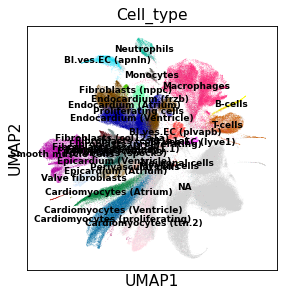

In [46]:
sc.pl.umap(adata, color= ['Cell_type'], legend_loc='on data', legend_fontsize='xx-small')

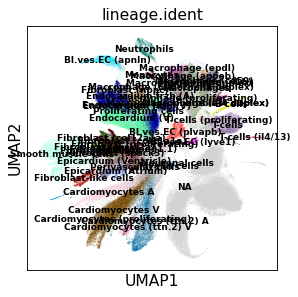

In [67]:
sc.pl.umap(adata, color= ['lineage.ident'], legend_loc='on data', legend_fontsize='xx-small')

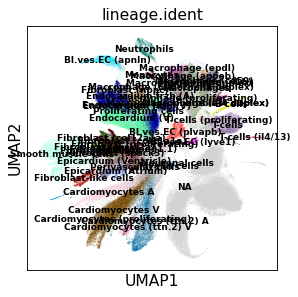

In [67]:
sc.pl.umap(adata, color= ['lineage.ident'], legend_loc='on data', legend_fontsize='xx-small')

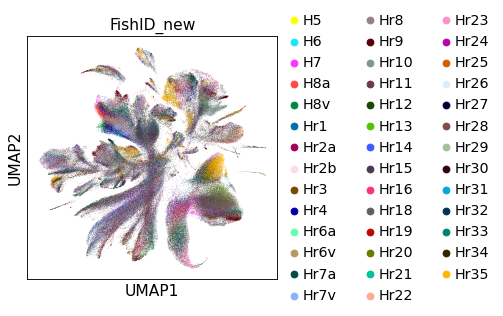

In [42]:
sc.pl.umap(adata, color= ['FishID_new'])

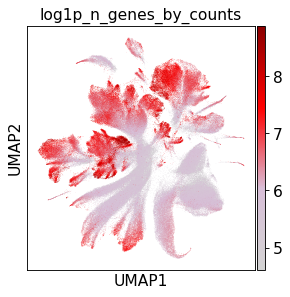

In [47]:
sc.pl.umap(adata, color= ['log1p_n_genes_by_counts'], color_map=cmap)

In [48]:
adata.write('./write/GSE159032_GSE158919_processed_all.h5ad')

In [2]:
adata = sc.read('./write/GSE159032_GSE158919_processed_all.h5ad')

In [3]:
adata1 = adata[~adata.obs['Cell_type'].isna().values,:].copy()

In [4]:
adata1.shape

(189807, 4768)

In [63]:
adata1.write('./write/GSE159032_GSE158919_processed_anno.h5ad')

In [5]:
adata2 = adata[adata.obs['Cell_type'].isna().values,:].copy()

In [6]:
adata2.shape

(135467, 4768)

In [8]:
X_pca1 = adata1.obsm['X_pca']
X_pca2 = adata2.obsm['X_pca']

In [9]:
from sklearn.metrics.pairwise import euclidean_distances
D_sub = euclidean_distances(X_pca2, X_pca1)

In [10]:
print(X_pca1.shape)
print(X_pca2.shape)
print(D_sub.shape)

(189807, 50)
(135467, 50)
(135467, 189807)


In [ ]:
from collections import defaultdict
cl_assigned = []
Rstore = defaultdict(list) # dictionary to store results
for i in range(D_sub.shape[0]):
    CellDis = D_sub[i,:]
    CellDis_sorted = np.argsort(CellDis)[:15]
    cl_assigned.append(np.in1d(range(len(CellDis)), CellDis_sorted))
    Rstore['MinDist'].append(np.min(CellDis[CellDis_sorted]))
    Rstore['MedianDist'].append(np.median(CellDis[CellDis_sorted]))
    Rstore['MaxDist'].append(np.max(CellDis[CellDis_sorted]))
    Rstore['SD'].append(np.std(CellDis[CellDis_sorted]))
    Rstore['CT'].append(adata1[CellDis_sorted,:].obs['Cell_type'].value_counts().index[0])
Rstore = pd.DataFrame.from_dict(Rstore)
Rstore.index = adata2.obs_names

In [ ]:
Rstore.to_csv('proj_result.csv')

In [13]:
adata2.obs['Cell_type'] = Rstore['CT'].values

In [16]:
np.setdiff1d(adata2.obs['FishID_new'].cat.categories,adata1.obs['FishID_new'].cat.categories)

array(['Hr16', 'Hr18'], dtype=object)

In [14]:
pd.crosstab(adata1.obs['FishID_new'], adata1.obs['Cell_type'])

Cell_type   B-cells  Bl.ves.EC (apnln)  Bl.ves.EC (lyve1)  Bl.ves.EC (plvapb)  \
FishID_new                                                                      
H5               49                 81                  6                  16   
H6               42                174                  0                  18   
H7               77                 45                 20                  55   
H8a               8                 14                  0                   2   
H8v               4                 12                 27                  98   
Hr1              26                178                108                 246   
Hr2a             75                245                203                 117   
Hr2b             78                297                186                 126   
Hr3              28                 55                 34                  71   
Hr4               5                 34                 73                 136   
Hr6a              5                 15                  0                   0   
Hr6v            117                 83                 70                 254   
Hr7a              3                 35                  0                   2   
Hr7v             11                136                 63                 169   
Hr8              20                 53                 43                 124   
Hr9              20                181                  6                  71   
Hr10            277                 16                 49                 218   
Hr11              8                  8                  0                 105   
Hr12             18                 46                 33                 150   
Hr13              7                  9                  5                 182   
Hr14             20                 44                 15                 123   
Hr15              0                  5                 50                  80   
Hr19              4                 39                  1                   1   
Hr20              5                 15                  0                  10   
Hr21              7                 24                  1                   3   
Hr22              0                  0                  0                   0   
Hr23              0                  0                  0                   0   
Hr24             50                119                 10                 121   
Hr25             25                 23                  6                  42   
Hr26             67                196                 46                 136   
Hr27             37                 75                  5                 210   
Hr28             65                133                 18                  58   
Hr29             41                102                 13                  52   
Hr30             23                372                 26                 111   
Hr31              2                112                  6                  46   
Hr32              2                 28                  3                  13   
Hr33             26                 75                  2                   3   
Hr34             33                206                 23                  71   
Hr35            196                182                 25                 306   

Cell_type   Cardiomyocytes (Atrium)  Cardiomyocytes (Ventricle)  \
FishID_new                                                        
H5                              437                         267   
H6                              238                         941   
H7                             1614                        1768   
H8a                             684                           0   
H8v                               0                         171   
Hr1                             666                        1868   
Hr2a                            178                        1100   
Hr2b                            179                        1378   
Hr3     

In [15]:
pd.crosstab(adata2.obs['FishID_new'], adata2.obs['Cell_type'])

Cell_type   B-cells  Bl.ves.EC (apnln)  Bl.ves.EC (lyve1)  Bl.ves.EC (plvapb)  \
FishID_new                                                                      
H5                3                  9                  0                   7   
H6                4                 20                  1                  11   
H7                9                 11                  0                  12   
H8a               0                 10                  0                   0   
H8v               7                 23                  5                  22   
Hr1               1                 34                  1                  16   
Hr2a             18                 65                  3                  13   
Hr2b             12                 75                  5                  11   
Hr3               4                 15                  1                  13   
Hr4               6                 15                  0                  28   
Hr6a              0                  0                  0                   0   
Hr6v             40                 69                  5                  37   
Hr7a              0                  4                  0                   0   
Hr7v              2                111                  1                  26   
Hr8               1                  5                  1                   2   
Hr9               3                 19                  0                  11   
Hr10              6                  3                  0                   5   
Hr11              4                  3                  0                   4   
Hr12              2                 51                  1                  25   
Hr13              1                 30                  0                  56   
Hr14              4                 47                  1                  16   
Hr15              1                  8                  1                   8   
Hr16              1                 67                  4                  19   
Hr18              2                 40                  8                   8   
Hr19              2                 36                  0                   0   
Hr20              0                 27                  0                   1   
Hr21              0                 18                  0                   1   
Hr22             14                 69                  6                  30   
Hr23              2                108                 12                  38   
Hr24              8                 21                  0                  19   
Hr25              0                  7                  0                  14   
Hr26              2                 29                  2                  25   
Hr27              0                  5                  0                  43   
Hr28              2                  8                  1                  18   
Hr29              0                  3                  0                  15   
Hr30              0                 20                  0                  34   
Hr31              0                 29                  0                   8   
Hr32              0                 19                  0                  11   
Hr33              1                 18                  1                   1   
Hr34              3                 27                  4                  44   
Hr35             20                 54                  4                 101   

Cell_type   Cardiomyocytes (Atrium)  Cardiomyocytes (Ventricle)  \
FishID_new                                                        
H5                              276                         551   
H6                              115                        1311   
H7                              497                        2666   
H8a                             293                         161   
H8v                               0                         430   
Hr1                             206            

# Tilly requests

In [101]:
adata = sc.read('./write/GSE159032_GSE158919_processed_anno.h5ad')

In [4]:
adata.obs.head(3)

Index    Age Development_stage Condition  Day  \
H5_AAACCTGAGACTACAA  GSM4817928  4-12m             adult   Healthy    0   
H5_AAACCTGAGCACGCCT  GSM4817928  4-12m             adult   Healthy    0   
H5_AAACCTGAGGATGTAT  GSM4817928  4-12m             adult   Healthy    0   

                         Strain Tissue    StudyID   CellType Genotype  ...  \
H5_AAACCTGAGACTACAA  Zebrabow M  heart  GSE159032  All cells       WT  ...   
H5_AAACCTGAGCACGCCT  Zebrabow M  heart  GSE159032  All cells       WT  ...   
H5_AAACCTGAGGATGTAT  Zebrabow M  heart  GSE159032  All cells       WT  ...   

                           paper.ident RNA_snn_res.2 RNA_snn_res.3  \
H5_AAACCTGAGACTACAA     Cardiomyocytes          19.0          10.0   
H5_AAACCTGAGCACGCCT  Bl.ves.EC (apnln)          25.0          31.0   
H5_AAACCTGAGGATGTAT        Fibroblasts          11.0           7.0   

                    RNA_snn_res.3.5        work.ident2        work.ident3  \
H5_AAACCTGAGACTACAA            10.0     Cardiomyocytes   Cardiomyocytes A   
H5_AAACCTGAGCACGCCT            41.0  Bl.ves.EC (apnln)  Endocardium 1 (V)   
H5_AAACCTGAGGATGTAT             2.0        Fibroblasts        Fibroblasts   

                            final.zoom     lineage.ident  \
H5_AAACCTGAGACTACAA   Cardiomyocytes A  Cardiomyocytes A   
H5_AAACCTGAGCACGCCT  Endocardium 1 (V)   Endocardium (V)   
H5_AAACCTGAGGATGTAT         Fibroblast        Fibroblast   

                                   Cell_type              Cell_name  
H5_AAACCTGAGACTACAA  Cardiomyocytes (Atrium)  ndH5_AAACCTGAGACTACAA  
H5_AAACCTGAGCACGCCT  Endocardium (Ventricle)  ndH5_AAACCTGAGCACGCCT  
H5_AAACCTGAGGATGTAT     Fibroblasts (const.)  ndH5_AAACCTGAGGATGTAT  

[3 rows x 68 columns]

In [5]:
adata.obs['Day'].value_counts()

7     88992
3     61941
0     22279
30    16595
Name: Day, dtype: int64

In [6]:
adata.obs_keys()

['Index',
 'Age',
 'Development_stage',
 'Condition',
 'Day',
 'Strain',
 'Tissue',
 'StudyID',
 'CellType',
 'Genotype',
 'Organism',
 'Gender',
 'Author',
 'FishID',
 'Treatment',
 'RFP',
 'db_scores',
 'predicted_db',
 'n_genes_by_counts',
 'log1p_n_genes_by_counts',
 'total_counts',
 'log1p_total_counts',
 'pct_counts_in_top_50_genes',
 'pct_counts_in_top_100_genes',
 'pct_counts_in_top_200_genes',
 'pct_counts_in_top_500_genes',
 'total_counts_mt',
 'log1p_total_counts_mt',
 'pct_counts_mt',
 'n_genes',
 'batch',
 'n_counts',
 'phase',
 'S_score',
 'G2M_score',
 'FishID_new',
 'CellID',
 'Cell',
 'orig.ident',
 'nCount_RNA',
 'nFeature_RNA',
 'percent.mito',
 'time',
 'morphine',
 'AV',
 'inhib',
 'so.far.ident.subtypes',
 'so.far.ident',
 'RNA_snn_res.4',
 'seurat_clusters',
 'work.ident',
 'fibro.subtypes',
 'is.inhib',
 'split.inhib',
 'zoom.ident',
 'zoom.subtypes',
 'plot.ident',
 'CM.ident',
 'paper.ident',
 'RNA_snn_res.2',
 'RNA_snn_res.3',
 'RNA_snn_res.3.5',
 'work.ident

In [102]:
DF = pd.crosstab(adata.obs['Cell_type'], adata.obs['FishID_new'], normalize=1)

In [103]:
meta = np.unique(adata.obs['FishID_new'].astype(str)+'_'+adata.obs['Day'].astype(str)+'_'+adata.obs['Condition'].astype(str)+'_'+adata.obs['Tissue'].astype(str))

In [104]:
%reload_ext rpy2.ipython

In [108]:
%%R
library(ggplot2)
library(dplyr)
library(ggpubr)
library(rstatix)
library(reshape2)
library(pheatmap)

In [109]:
%%R -i DF -i meta
anno=data.frame(do.call("rbind", strsplit(meta, split="_")))
colnames(anno) = c("fishID", "Day", "Condition", "Tissue")

In [110]:
%%R
anno = anno[order(as.numeric(anno$Day), anno$Tissue),]
DF = DF[,match(anno$fishID,colnames(DF))]

print(anno)
print(colnames(DF))

   fishID Day Condition    Tissue
4     H8a   0   Healthy    Atrium
1      H5   0   Healthy     heart
2      H6   0   Healthy     heart
3      H7   0   Healthy     heart
5     H8v   0   Healthy Ventricle
6    Hr10   3   Injured     heart
7    Hr11   3   Injured     heart
8    Hr12   3   Injured     heart
16   Hr22   3   Injured     heart
17   Hr23   3   Injured     heart
18   Hr24   3   Injured     heart
19   Hr25   3   Injured     heart
20   Hr26   3   Injured     heart
21   Hr27   3   Injured     heart
22   Hr28   3   Injured     heart
23   Hr29   3   Injured     heart
30   Hr34   3   Injured     heart
31   Hr35   3   Injured     heart
34   Hr6a   7   Injured    Atrium
36   Hr7a   7   Injured    Atrium
9    Hr13   7   Injured     heart
10   Hr14   7   Injured     heart
11   Hr15   7   Injured     heart
13    Hr1   7   Injured     heart
24   Hr2a   7   Injured     heart
25   Hr2b   7   Injured     heart
26   Hr30   7   Injured     heart
27   Hr31   7   Injured     heart
28   Hr32   7 

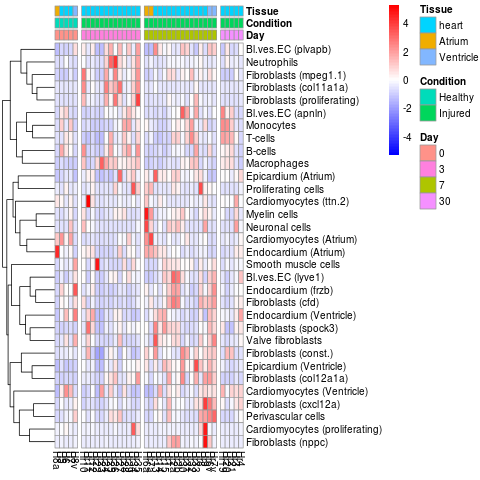

In [111]:
%%R
annotation_col = data.frame(Day = as.factor(anno$Day), Condition = as.factor(anno$Condition), Tissue=as.factor(anno$Tissue))
rownames(annotation_col) = colnames(DF)
annotation_col$Day = factor(annotation_col$Day, levels=c("0", "3", "7", "30"))
annotation_col$Tissue = factor(annotation_col$Tissue, levels=c("heart", "Atrium", "Ventricle"))

pheatmap(DF, color = colorRampPalette(c("blue","white", "red"))(100), annotation_col=annotation_col, cluster_cols=F, scale="row", gaps_col=c(5,18,34))

In [112]:
%%R
colnames(DF) = meta
DF$Cell_type = rownames(DF)
DFmelt = melt(DF, id="Cell_type")
print(head(DFmelt))

                   Cell_type           variable       value
1                    B-cells H5_0_Healthy_heart 0.001629328
2          Bl.ves.EC (apnln) H5_0_Healthy_heart 0.002851324
3          Bl.ves.EC (lyve1) H5_0_Healthy_heart 0.000000000
4         Bl.ves.EC (plvapb) H5_0_Healthy_heart 0.000407332
5    Cardiomyocytes (Atrium) H5_0_Healthy_heart 0.139307536
6 Cardiomyocytes (Ventricle) H5_0_Healthy_heart 0.000000000


In [113]:
%%R
DFmelt$Day = gsub(".*_(.*)_.*_.*", "\\1", DFmelt[,2])

In [114]:
%%R
DFmelt$Day = factor(DFmelt$Day, levels=c("0", "3", "7", "30"))

In [115]:
%%R
colnames(DFmelt)[3] = "Proportion"

[1] FALSE


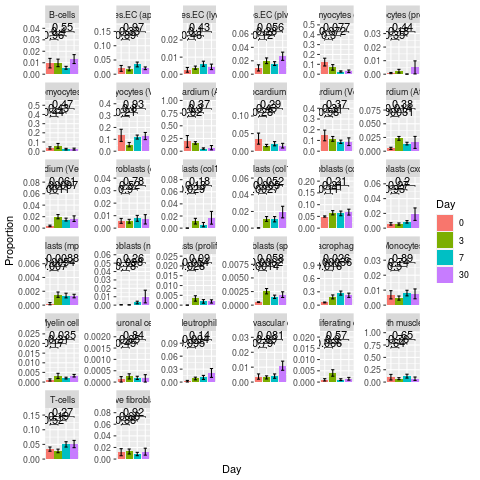

In [116]:
%%R
my_comp = list(c("0", "3"), c("0", "7"), c("0", "30"))
p = ggplot(DFmelt, aes(x=Day, y=Proportion, fill=Day)) + 
    stat_summary(fun=mean, geom="bar", position=position_dodge()) + facet_wrap(~Cell_type, ncol=6, scale="free") +
    stat_summary(fun.data=mean_se, geom="errorbar", position=position_dodge(width=0.9), width=0.4)
p = p + stat_compare_means(aes(label = ..p..), hide.ns=TRUE, comparisons=my_comp, method="t.test") +
    scale_y_continuous(expand = expansion(mult = c(0, 0.2)))
p = p + theme(axis.text.x=element_blank(), axis.ticks.x=element_blank())
p
ggsave("barplot_celltype_freq.pdf", width=12, height=10)
p

In [117]:
tnfa = adata.raw[:, "tnfa"].X.toarray().flatten()
nfkb1 = adata.raw[:, "nfkb1"].X.toarray().flatten()

In [118]:
adata.obs['meta'] = adata.obs['FishID_new'].astype(str)+'_'+adata.obs['Day'].astype(str)+'_'+adata.obs['Condition'].astype(str)+'_'+adata.obs['Tissue'].astype(str)

In [119]:
meta = adata.obs['meta'].values

In [120]:
ct = adata.obs['Cell_type']

In [125]:
%%R -i tnfa -i nfkb1 -i meta -i ct
anno=data.frame(do.call("rbind", strsplit(meta, split="_")))
colnames(anno) = c("fishID", "Day", "Condition", "Tissue")
DF = data.frame(tnfa = tnfa, nfkb1 = nfkb1)
DF = cbind(DF, anno)
DF = cbind(DF, as.data.frame(ct))
print(head(DF))
DF$Day = factor(DF$Day, levels = c("0", "3", "7", "30"))

                    tnfa nfkb1 fishID Day Condition Tissue
H5_AAACCTGAGACTACAA    0     0     H5   0   Healthy  heart
H5_AAACCTGAGCACGCCT    0     0     H5   0   Healthy  heart
H5_AAACCTGAGGATGTAT    0     0     H5   0   Healthy  heart
H5_AAACCTGAGTCCATAC    0     0     H5   0   Healthy  heart
H5_AAACCTGAGTGAATTG    0     0     H5   0   Healthy  heart
H5_AAACCTGGTCTCATCC    0     0     H5   0   Healthy  heart
                                         ct
H5_AAACCTGAGACTACAA Cardiomyocytes (Atrium)
H5_AAACCTGAGCACGCCT Endocardium (Ventricle)
H5_AAACCTGAGGATGTAT    Fibroblasts (const.)
H5_AAACCTGAGTCCATAC               Monocytes
H5_AAACCTGAGTGAATTG    Endocardium (Atrium)
H5_AAACCTGGTCTCATCC  Cardiomyocytes (ttn.2)


In [126]:
%%R
DFgene = DF %>% group_by(ct) %>% summarise(cnt = sum(tnfa!= 0)) %>% as.data.frame()
ct_new = DFgene$ct[DFgene$cnt!=0]
DFnew = DF[DF$ct %in% ct_new,]

                 ct  .y. group1 group2  n1   n2  statistic         df     p
1           B-cells tnfa      0      3 180  817 -1.5727068  472.95590 0.116
2           B-cells tnfa      0      7 180  435 -1.9905586  603.24507 0.047
3           B-cells tnfa      0     30 180   49 -0.6779025   56.51351 0.501
4 Bl.ves.EC (apnln) tnfa      0      3 326 1106        NaN        NaN   NaN
5 Bl.ves.EC (apnln) tnfa      0      7 326 1868 -1.7094861 1867.00000 0.088
6 Bl.ves.EC (apnln) tnfa      0     30 326  167        NaN        NaN   NaN
  p.adj p.adj.signif
1 0.116           ns
2 0.047            *
3 0.501           ns
4   NaN             
5 0.088           ns
6   NaN             


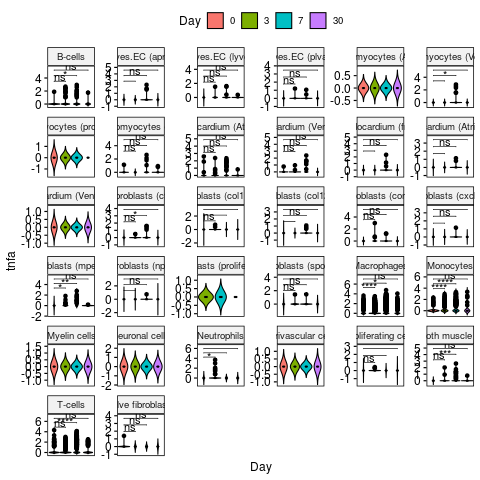

In [127]:
%%R
stat.test = DFnew %>% 
    group_by(ct) %>%
    t_test(tnfa ~ Day, p.adjust.method="none", ref.group="0") %>%
    add_significance()
print(head(as.data.frame(stat.test)))
stat.test = stat.test %>% 
    add_xy_position(x="Day")

p = ggviolin(DF, x="Day", y="tnfa", fill="Day", facet.by="ct", 
            add="boxplot",add.params = list(fill = "white")) 
p = p + stat_pvalue_manual(stat.test,  label = "p.adj.signif", tip.length = 0.01) +
    scale_y_continuous(expand = expansion(mult = c(0.05, 0.12)))
p = p + theme(axis.text.x=element_blank(), axis.ticks.x=element_blank())
p = p + facet_wrap(~ct,scales="free")
p
ggsave("Violin_tnfa.pdf", useDingbats=FALSE, width=12, height=10)    
p

                 ct   .y. group1 group2  n1   n2 statistic   df        p
1           B-cells nfkb1      0      3 180  817 -4.357679  816 1.48e-05
2           B-cells nfkb1      0      7 180  435 -2.231919  434 2.60e-02
3           B-cells nfkb1      0     30 180   49 -1.000000   48 3.22e-01
4 Bl.ves.EC (apnln) nfkb1      0      3 326 1106 -2.584868 1105 1.00e-02
5 Bl.ves.EC (apnln) nfkb1      0      7 326 1868 -2.413136 1867 1.60e-02
6 Bl.ves.EC (apnln) nfkb1      0     30 326  167       NaN  NaN      NaN
     p.adj p.adj.signif
1 1.48e-05         ****
2 2.60e-02            *
3 3.22e-01           ns
4 1.00e-02           **
5 1.60e-02            *
6      NaN             


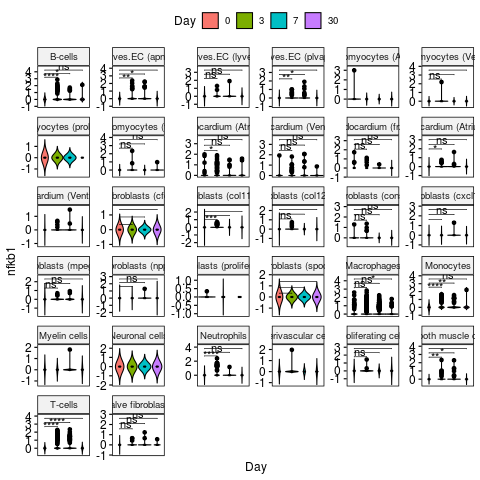

In [128]:
%%R
stat.test = DFnew %>% 
    group_by(ct) %>%
    t_test(nfkb1 ~ Day, p.adjust.method="none", ref.group="0") %>%
    add_significance()
print(head(as.data.frame(stat.test)))
stat.test = stat.test %>% 
    add_xy_position(x="Day")

p = ggviolin(DF, x="Day", y="nfkb1", fill="Day", facet.by="ct", 
            add="boxplot",add.params = list(fill = "white")) 
p = p + stat_pvalue_manual(stat.test,  label = "p.adj.signif", tip.length = 0.01) +
    scale_y_continuous(expand = expansion(mult = c(0.05, 0.12)))
p = p + theme(axis.text.x=element_blank(), axis.ticks.x=element_blank())
p = p + facet_wrap(~ct,scales="free")
p
ggsave("Violin_nfkb1.pdf", useDingbats=FALSE, width=12, height=10)    
p